In [2]:
###importing the libraries and dataset

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dfapp = pd.read_csv('application_data.csv')
dfapp.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### Importing the previous application

In [4]:
dfprevious = pd.read_csv("previous_application.csv")
dfprevious.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


#### Inspecting the dataframes 

In [5]:
dfapp.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [6]:
dfapp.shape

(307511, 122)

In [7]:
dfapp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
dfprevious.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.048575e+06,1.048575e+06,815566.000000,1.048575e+06,1.048575e+06,4.891790e+05,8.076100e+05,1.048575e+06,1.048575e+06,489179.000000,...,3721.000000,1.048575e+06,1.048575e+06,815569.000000,627867.000000,627867.000000,627867.000000,627867.000000,627867.000000,627867.000000
mean,1.922775e+06,2.784367e+05,15891.265151,1.742698e+05,1.950000e+05,6.700778e+03,2.262892e+05,1.248486e+01,9.964123e-01,0.079619,...,0.774922,-8.820381e+02,3.183904e+02,15.995639,342387.346201,13833.802031,33614.930898,76591.061435,81985.701661,0.331530
std,5.329366e+05,1.028569e+05,14745.557438,2.910789e+05,3.169407e+05,2.078570e+04,3.134490e+05,3.333140e+00,5.979011e-02,0.107882,...,0.099514,7.792649e+02,7.996734e+03,14.508109,88595.441587,72460.126454,106643.960780,149653.053854,153298.887247,0.470764
min,1.000001e+06,1.000010e+05,0.000000,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000014,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000,-2921.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.460642e+06,1.893860e+05,6301.350000,1.890000e+04,2.427750e+04,0.000000e+00,5.058000e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.303000e+03,-1.000000e+00,6.000000,365243.000000,-1626.000000,-1241.000000,-1313.000000,-1269.000000,0.000000
50%,1.923419e+06,2.788100e+05,11250.000000,7.081650e+04,8.025300e+04,1.624500e+03,1.115116e+05,1.200000e+01,1.000000e+00,0.051062,...,0.835095,-5.830000e+02,4.000000e+00,12.000000,365243.000000,-830.000000,-361.000000,-537.000000,-498.000000,0.000000
75%,2.384448e+06,3.677445e+05,20523.003750,1.800000e+05,2.152395e+05,7.749000e+03,2.295000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.810000e+02,8.500000e+01,24.000000,365243.000000,-410.000000,128.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,418058.145000,6.905160e+06,6.905160e+06,2.150100e+06,6.905160e+06,2.300000e+01,1.000000e+00,0.989740,...,1.000000,-2.000000e+00,4.000000e+06,84.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [9]:
dfprevious.shape

(1048575, 37)

In [10]:
dfprevious.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1048575 non-null  int64  
 1   SK_ID_CURR                   1048575 non-null  int64  
 2   NAME_CONTRACT_TYPE           1048575 non-null  object 
 3   AMT_ANNUITY                  815566 non-null   float64
 4   AMT_APPLICATION              1048575 non-null  float64
 5   AMT_CREDIT                   1048575 non-null  float64
 6   AMT_DOWN_PAYMENT             489179 non-null   float64
 7   AMT_GOODS_PRICE              807610 non-null   float64
 8   WEEKDAY_APPR_PROCESS_START   1048575 non-null  object 
 9   HOUR_APPR_PROCESS_START      1048575 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1048575 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1048575 non-null  int64  
 12  RATE_DOWN_PAYMENT            489179 non-nu

#### Inspecting the datatypes of datasets

In [11]:
dfapp.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
                               ...   
AMT_REQ_CREDIT_BUREAU_DAY     float64
AMT_REQ_CREDIT_BUREAU_WEEK    float64
AMT_REQ_CREDIT_BUREAU_MON     float64
AMT_REQ_CREDIT_BUREAU_QRT     float64
AMT_REQ_CREDIT_BUREAU_YEAR    float64
Length: 122, dtype: object

In [12]:
dfprevious.dtypes

SK_ID_PREV                       int64
SK_ID_CURR                       int64
NAME_CONTRACT_TYPE              object
AMT_ANNUITY                    float64
AMT_APPLICATION                float64
AMT_CREDIT                     float64
AMT_DOWN_PAYMENT               float64
AMT_GOODS_PRICE                float64
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
FLAG_LAST_APPL_PER_CONTRACT     object
NFLAG_LAST_APPL_IN_DAY           int64
RATE_DOWN_PAYMENT              float64
RATE_INTEREST_PRIMARY          float64
RATE_INTEREST_PRIVILEGED       float64
NAME_CASH_LOAN_PURPOSE          object
NAME_CONTRACT_STATUS            object
DAYS_DECISION                    int64
NAME_PAYMENT_TYPE               object
CODE_REJECT_REASON              object
NAME_TYPE_SUITE                 object
NAME_CLIENT_TYPE                object
NAME_GOODS_CATEGORY             object
NAME_PORTFOLIO                  object
NAME_PRODUCT_TYPE               object
CHANNEL_TYPE             

#### FINDING COLUMNS WITH MORE THAN 50% NULL VALUES 

In [13]:
nullcolumns = dfapp.columns[dfapp.isnull().sum()/len(dfapp) > 0.5].tolist() ##list of columns that have null values 
nullcolumns

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE']

In [14]:
len(nullcolumns)

41

#### Drop all the null columns 

In [15]:
dfapp.drop(['OWN_CAR_AGE','EXT_SOURCE_1','APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BUILD_AVG','COMMONAREA_AVG','ELEVATORS_AVG','ENTRANCES_AVG',
 'FLOORSMIN_AVG','LANDAREA_AVG','LIVINGAPARTMENTS_AVG','LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE','COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE'], axis = 1, inplace = True)


In [16]:
dfapp.shape

(307511, 81)

#### Dropping unnecessary columns 

In [17]:
dfapp.drop(['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','FLAG_EMAIL','CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY','DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6',
       'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
       'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21','EXT_SOURCE_2','EXT_SOURCE_3', 'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE'], axis = 1, inplace = True)

In [18]:
dfapp.shape ### 45 columns left

(307511, 45)

In [19]:
dfapp.isnull().sum()/len(dfapp)*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OCCUPATION_TYPE                 31.345545
WEEKDAY_APPR_PROCESS_START       0.000000
HOUR_APPR_PROCESS_START          0

#### Dropping the columns with more that 45% missing values 

In [20]:
dropcolumns = dfapp.columns[dfapp.isnull().sum()/len(dfapp) > 0.45].tolist() ##list of columns that have null values 
dropcolumns

['YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'EMERGENCYSTATE_MODE']

In [21]:
dfapp.drop(['YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'EMERGENCYSTATE_MODE'], axis = 1, inplace = True)


In [22]:
dfapp.shape

(307511, 37)

In [23]:
dfapp.isnull().sum()/len(dfapp)*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
OCCUPATION_TYPE                31.345545
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
REG_REGION_NOT_L

#### Columns to be imputed. Columns with more than 13 % missing values can be imputed

In [24]:
dfapp['AMT_REQ_CREDIT_BUREAU_HOUR'].describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

<Figure size 2160x576 with 0 Axes>

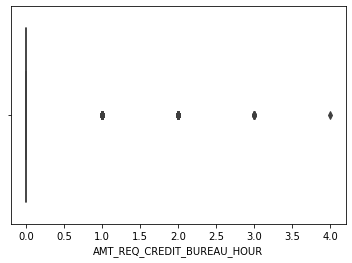

<Figure size 2160x576 with 0 Axes>

In [25]:
sns.boxplot(x='AMT_REQ_CREDIT_BUREAU_HOUR', data = dfapp)
plt.figure(figsize = (30,8))

Mean is 0.006 and highest value is 4. That's an outlier. So we can use median 0 as a metric to impute in AMT_REQ_CREDIT_BUREAU_HOUR.

In [26]:
dfapp.AMT_REQ_CREDIT_BUREAU_DAY.describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

As above mean is 0.007 and median is 0.00, It is safe to impute it with 0.

In [27]:
dfapp.AMT_REQ_CREDIT_BUREAU_WEEK.describe()    

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

There is an outlier maximum value of 8 which is distorting the mean. Hence we must use the median value 0 for imputing. 

In [28]:
dfapp['AMT_REQ_CREDIT_BUREAU_MON'].describe()      


count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

There is an outlier 27 distorting the mean. Hence we can use median value of 0.00 for imputing. 

In [29]:
dfapp.AMT_REQ_CREDIT_BUREAU_QRT.describe()    

count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

An outlier of 261 is distorting the mean. We must use the median 0.00 for imputing. 

In [30]:
dfapp['AMT_REQ_CREDIT_BUREAU_YEAR'].describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

Use median 1 for imputing. 

In [31]:
dfapp.dtypes

SK_ID_CURR                       int64
TARGET                           int64
NAME_CONTRACT_TYPE              object
CODE_GENDER                     object
FLAG_OWN_CAR                    object
FLAG_OWN_REALTY                 object
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE                 object
NAME_INCOME_TYPE                object
NAME_EDUCATION_TYPE             object
NAME_FAMILY_STATUS              object
NAME_HOUSING_TYPE               object
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
OCCUPATION_TYPE                 object
WEEKDAY_APPR_PROCESS_START      object
HOUR_APPR_PROCESS_START          int64
REG_REGION_NOT_LIVE_REGION       int64
REG_REGION_NOT_WORK_REGIO

#### Age Variable analysis

In [32]:
dfapp.DAYS_BIRTH. describe()

count    307511.000000
mean     -16036.995067
std        4363.988632
min      -25229.000000
25%      -19682.000000
50%      -15750.000000
75%      -12413.000000
max       -7489.000000
Name: DAYS_BIRTH, dtype: float64

All ages are in negative and as days since birth. They must be converted to absolute form and as ages. 

In [33]:
dfapp['AGE'] = dfapp['DAYS_BIRTH'].apply(lambda x: x/365*(-1))

In [34]:
dfapp['AGE'].describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: AGE, dtype: float64

#### Analysis of other days related columns 

In [35]:
negative_values=['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']
dfapp[negative_values]=dfapp[negative_values].apply(pd.to_numeric)

In [36]:
#dfapp['DAYS_EMPLOYED'] = dfapp['DAYS_EMPLOYED'].apply(lambda x : x/365*(-1))

In [37]:
#dfapp['DAYS_REGISTRATION'] = dfapp['DAYS_REGISTRATION'].apply(lambda x : x/365*(-1))

In [38]:
#dfapp['DAYS_ID_PUBLISH'] = dfapp['DAYS_ID_PUBLISH'].apply(lambda x : x/365*(-1))

#### Dropping rows with null values 

In [39]:

emptyrow=dfapp.isnull().sum(axis=1)
emptyrow=list(emptyrow[emptyrow.values>=0.3*len(dfapp)].index)
len(emptyrow)

0

There are no empty rows 

#### Imbalance percentage  

In [40]:
100*dfapp['TARGET'].value_counts(normalize = True)

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

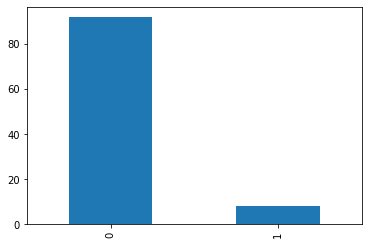

In [41]:
(100*dfapp.TARGET.value_counts(normalize = True)).plot.bar()
plt.savefig("IMBALANCE PERCENTAGE")

Dataframe is imbalance with those TARGET 0 being 91.92% and 1 being 8.07%.

#### Finding the no. of unique values in categorical values 

In [42]:
dfapp.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
dtype: int64

Gender has 3 variables 


In [43]:
dfapp.CODE_GENDER.value_counts(normalize = True)*100

F      65.834393
M      34.164306
XNA     0.001301
Name: CODE_GENDER, dtype: float64

In [44]:
#UPDATING XNA as females as the no. of females is way more than males.

dfapp.loc[dfapp['CODE_GENDER']=='XNA','CODE_GENDER']='F'
dfapp['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [45]:
###Finding all columns with numeric values 

dfapp.select_dtypes('int64').apply(pd.Series.nunique, axis = 0)

SK_ID_CURR                     307511
TARGET                              2
CNT_CHILDREN                       15
DAYS_BIRTH                      17460
DAYS_EMPLOYED                   12574
DAYS_ID_PUBLISH                  6168
HOUR_APPR_PROCESS_START            24
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
dtype: int64

In [46]:
dfapp.select_dtypes('float64').apply(pd.Series.nunique, axis = 0)

AMT_INCOME_TOTAL               2548
AMT_CREDIT                     5603
AMT_ANNUITY                   13672
AMT_GOODS_PRICE                1002
REGION_POPULATION_RELATIVE       81
DAYS_REGISTRATION             15688
AMT_REQ_CREDIT_BUREAU_HOUR        5
AMT_REQ_CREDIT_BUREAU_DAY         9
AMT_REQ_CREDIT_BUREAU_WEEK        9
AMT_REQ_CREDIT_BUREAU_MON        24
AMT_REQ_CREDIT_BUREAU_QRT        11
AMT_REQ_CREDIT_BUREAU_YEAR       25
AGE                           17460
dtype: int64

#### Converting all numeric values 

In [47]:
Num_columns = ['CNT_CHILDREN','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_ID_PUBLISH','HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION',     
'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY', 'AMT_INCOME_TOTAL','AMT_CREDIT',                    
'AMT_ANNUITY',                   
'AMT_GOODS_PRICE',                
'REGION_POPULATION_RELATIVE',       
'DAYS_REGISTRATION',             
'AMT_REQ_CREDIT_BUREAU_HOUR',        
'AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_MON',
'AMT_REQ_CREDIT_BUREAU_QRT', 
'AMT_REQ_CREDIT_BUREAU_YEAR']
dfapp[Num_columns]=dfapp[Num_columns].apply(pd.to_numeric)
dfapp.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,1.0,25.920548
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,School,0.0,0.0,0.0,0.0,0.0,0.0,45.931507
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,Government,0.0,0.0,0.0,0.0,0.0,0.0,52.180822
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,Business Entity Type 3,NaN,NaN,NaN,NaN,NaN,NaN,52.068493
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,1,1,Religion,0.0,0.0,0.0,0.0,0.0,0.0,54.608219


#### Checking for outliers 

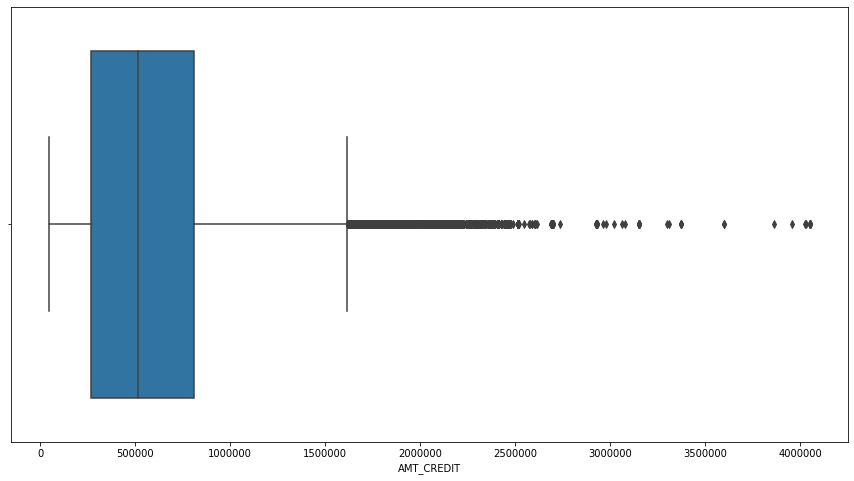

In [48]:
plt.figure(figsize=(15,8))
sns.boxplot(data = dfapp, x = 'AMT_CREDIT')

Amount credit has an outlier. 4000000 is the outlier.

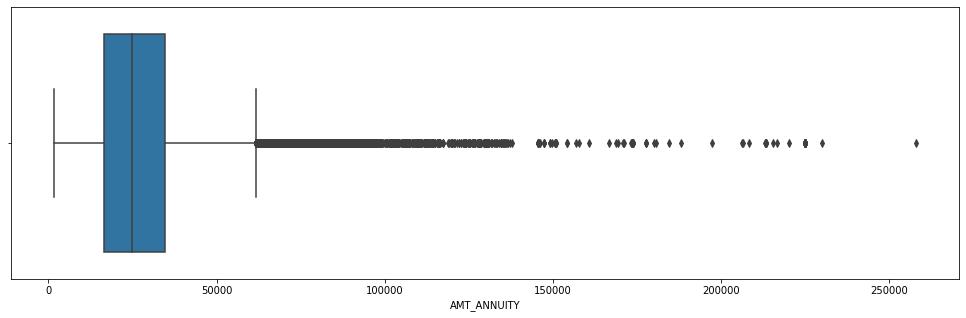

In [49]:
plt.figure(figsize = (17,5))
sns.boxplot(data = dfapp, x = 'AMT_ANNUITY' )

This variable is heavily distorted. There seem to be several values beyond the 75%. The outlier being a value more than 250000. 

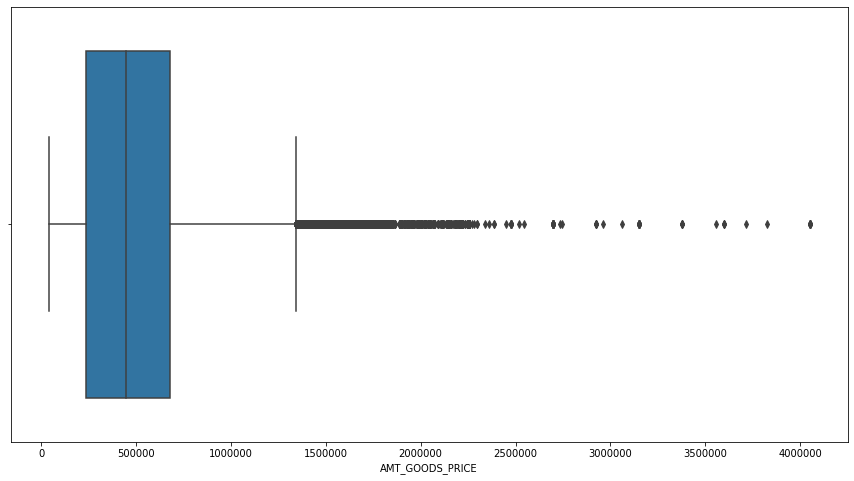

In [50]:
plt.figure(figsize=(15,8))
sns.boxplot(data = dfapp, x= 'AMT_GOODS_PRICE')

Goods price has an outlier of 4000000. 

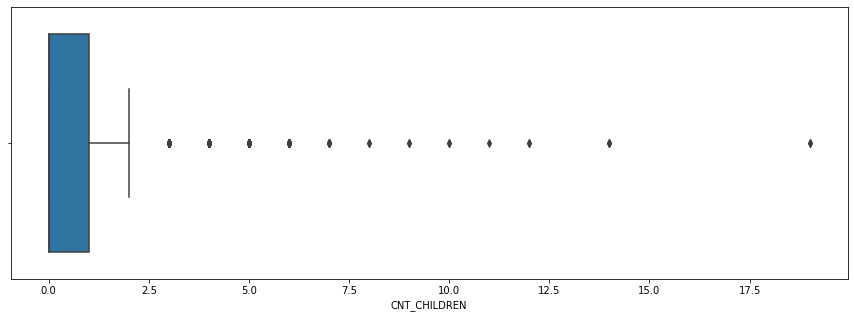

In [51]:
plt.figure(figsize=(15,5))
sns.boxplot(data = dfapp, x = 'CNT_CHILDREN')

Most of the variable ranges between 0 to 1 and the outlier is more than 17.

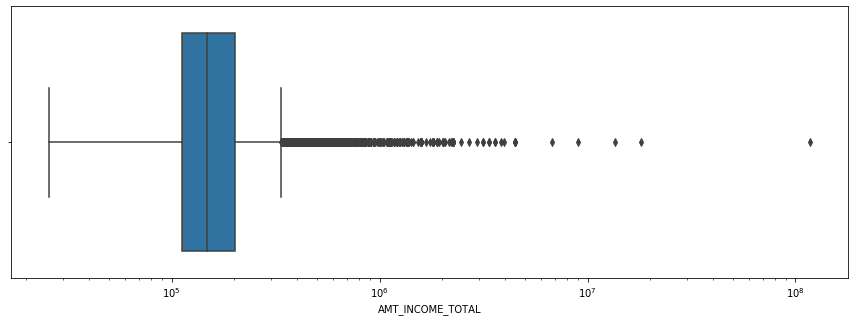

In [52]:
plt.figure(figsize=(15,5))
sns.boxplot(data = dfapp, x = 'AMT_INCOME_TOTAL')
plt.xscale('log')

In [53]:
dfapp.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

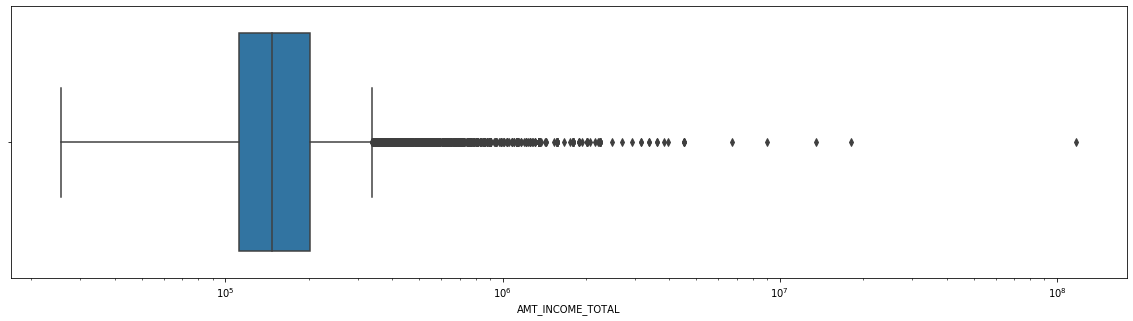

In [54]:
plt.figure(figsize = (20,5))
sns.boxplot(data = dfapp, x = 'AMT_INCOME_TOTAL')
plt.xscale('log')

There is an outlier of 17000000. 

#### Binning values 

In [55]:
dfapp.AMT_INCOME_TOTAL.max()

117000000.0

In [56]:
dfapp.AMT_INCOME_TOTAL.min()

25650.0

In [57]:
dfapp.AMT_INCOME_TOTAL.mean()

168797.9192969845

In [58]:
bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
       '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
       '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

dfapp['AMT_INCOME_RANGE']=pd.cut(dfapp['AMT_INCOME_TOTAL'],bins,labels=slot)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

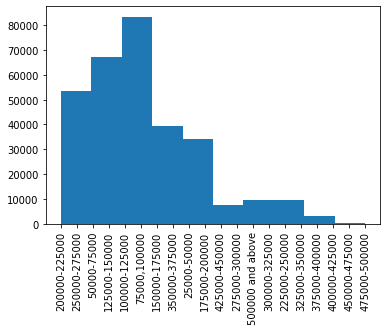

In [59]:
plt.hist(dfapp['AMT_INCOME_RANGE'])
plt.xticks(rotation = 90)

Income total of 75000-100000 seems to be the highest. 

#### Binning Amount Credit

In [60]:
dfapp.AMT_CREDIT.mean()

599025.9997057016

In [61]:
dfapp.AMT_CREDIT.max()

4050000.0

In [62]:
dfapp.AMT_CREDIT.min()

45000.0

In [63]:
bins = [0,150000,200000,250000,300000,350000,400000,450000,500000,550000,600000,650000,700000,750000,800000,850000,900000,1000000000]
slots = ['0-150000', '150000-200000','200000-250000', '250000-300000', '300000-350000', '350000-400000','400000-450000',
        '450000-500000','500000-550000','550000-600000','600000-650000','650000-700000','700000-750000','750000-800000',
        '800000-850000','850000-900000','900000 and above']

dfapp['AMT_CREDIT_RANGE']=pd.cut(dfapp['AMT_CREDIT'],bins=bins,labels=slots)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 <a list of 17 Text xticklabel objects>)

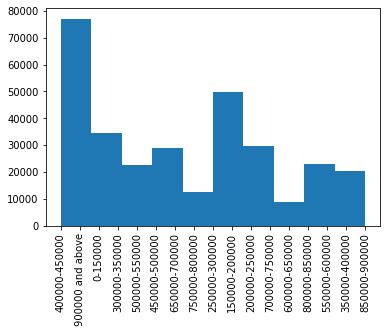

In [64]:
plt.hist(dfapp['AMT_CREDIT_RANGE'])
plt.xticks(rotation = 90)

Credit Range of 400000-450000 is the highest. 

#### Splitting the dataframes 

In [65]:
dfapp_1 = dfapp[dfapp['TARGET']== 1]
dfapp_0 = dfapp[dfapp['TARGET']== 0]

In [66]:
dfapp_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Business Entity Type 3,0.0,0.0,0.0,0.0,0.0,1.0,25.920548,200000-225000,400000-450000
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,Business Entity Type 3,0.0,0.0,0.0,0.0,2.0,2.0,51.298630,100000-125000,900000 and above
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,Business Entity Type 3,0.0,0.0,0.0,2.0,0.0,4.0,47.895890,200000-225000,900000 and above
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,Self-employed,0.0,0.0,0.0,0.0,0.0,2.0,36.668493,125000-150000,250000-300000
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,XNA,0.0,0.0,0.0,0.0,0.0,0.0,67.928767,"75000,100000",250000-300000


In [67]:
dfapp_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,School,0.0,0.0,0.0,0.0,0.0,0.0,45.931507,250000-275000,900000 and above
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Government,0.0,0.0,0.0,0.0,0.0,0.0,52.180822,50000-75000,0-150000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Business Entity Type 3,NaN,NaN,NaN,NaN,NaN,NaN,52.068493,125000-150000,300000-350000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,Religion,0.0,0.0,0.0,0.0,0.0,0.0,54.608219,100000-125000,500000-550000
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,Other,0.0,0.0,0.0,0.0,1.0,1.0,46.413699,"75000,100000",450000-500000


## UNIVARIATE ANALYSIS

#### Gender vs Target

In [68]:
def univariateplot(column,l,b):

    plt.figure(figsize=(l,b))
    ax = sns.countplot(x=column,hue='TARGET',data=dfapp)
    title = column + ' vs POPULATION'
    ax.set(title= title)
    plt.xticks(rotation = 45)
    
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2,
                height + 10,
                format(height),
                ha="center")
    
    

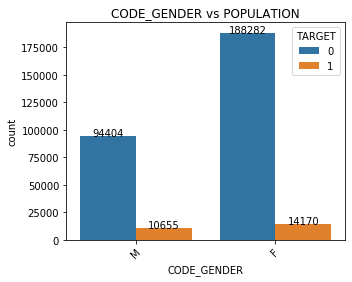

In [69]:
univariateplot('CODE_GENDER', 5,4)
plt.savefig('Gender Vs Population.png')

#### *Points to infer*
10% of male applicants defaulted. 6.9% of females defaulted. 
Females defaulted less than men. 

#### Contract vs Default 

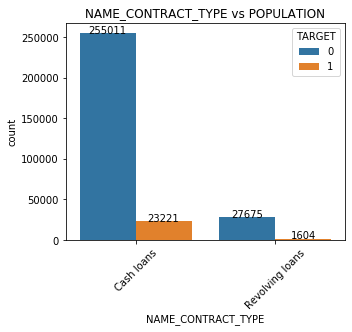

In [70]:
univariateplot('NAME_CONTRACT_TYPE',5,4)
plt.savefig('Contracttype')

#### *Points to infer*
8.3% of those who have cash loans defaulted while 5.4% of those with revolving loans defaulted. 
Those with revolving loans defaulted less. 

#### Owning a car vs default 

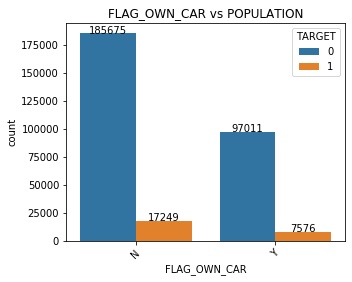

In [71]:
univariateplot('FLAG_OWN_CAR',5,4)

#### *Points to infer*
8.5% of those without a car defaulted. 7.2% of those with a car defaulted. 
Those without a car defaulted often. 

#### Owning realty vs Default

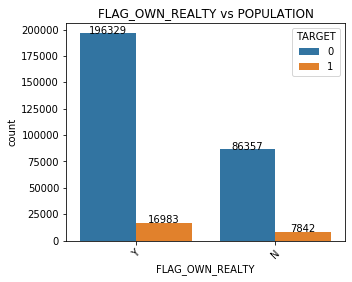

In [72]:
univariateplot('FLAG_OWN_REALTY',5,4)

#### *Points to infer*
7.9% of those who own a realty defaulted. 8.3% of those without a realty defaulted. 
Those without a realty seem to default often. 

#### Accompany Type Vs Default 

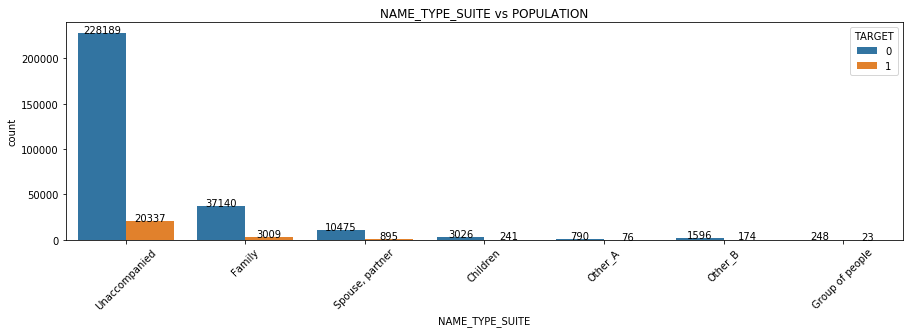

In [73]:
univariateplot('NAME_TYPE_SUITE',15,4)

#### *Points to infer*

8.1% of those who were unaccompanied defaulted. 7.4% of those who were accompanied by family defaulted. 7.8% of those accompanied by spouse defaulted. 7.3% of those accompanied by children defaulted. 8.7% and 9.8% of other A and other_b defaulted respectively. 8.4% of those with a group of people defaulted. 

Those accompanied with family, partner and children defaulted less. 

#### Does nature of income affect Default Status ?

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


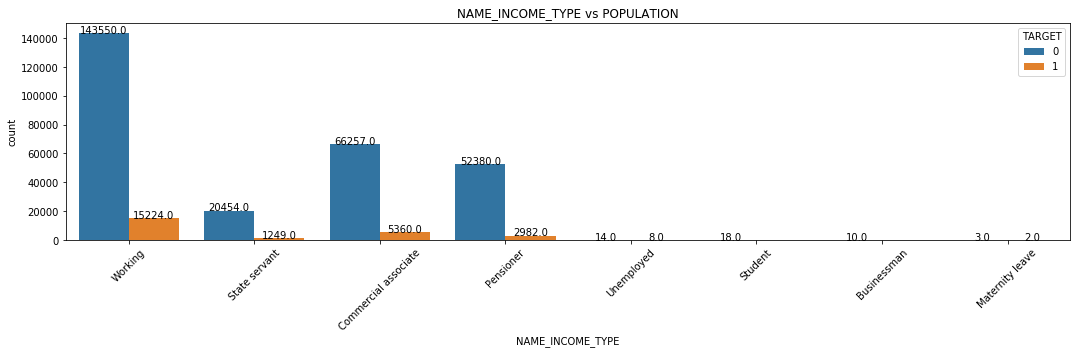

In [74]:
univariateplot('NAME_INCOME_TYPE',18,4)

#### *Points to infer*

9.5% of working employees deafulted. 5.7%of state servants defaulted. 7.4% of commercial associates defaulted. 5.3% of pensioners defaulted. 3.6% of unemployed defaulted. 40% of those of maternity leave defaulted. 
No businessman or student defaulted.

#### Does education affect default ?

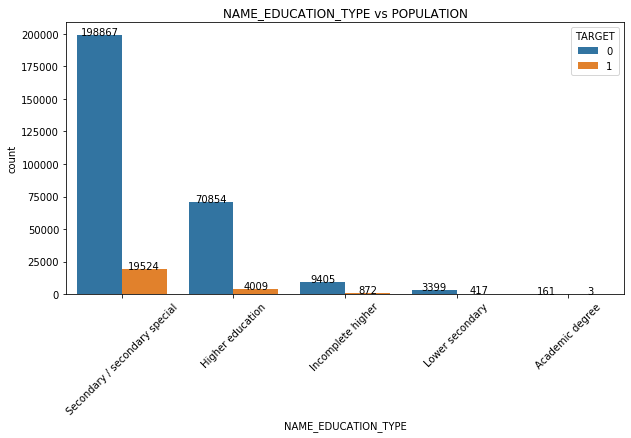

In [75]:
univariateplot('NAME_EDUCATION_TYPE',10,5)

#### *Points to infer*
8.9% of those with secondary education defaulted. 5.3% of higher education population defaulted. 8.4% of incomplete education population defaulted. 10.9% of lower secondary population defaulted. Only 1.8% of those with academic degree defaulted. 

Those with academic degrees defaulted the Least. 

#### Does family status affect Default ?


posx and posy should be finite values
posx and posy should be finite values


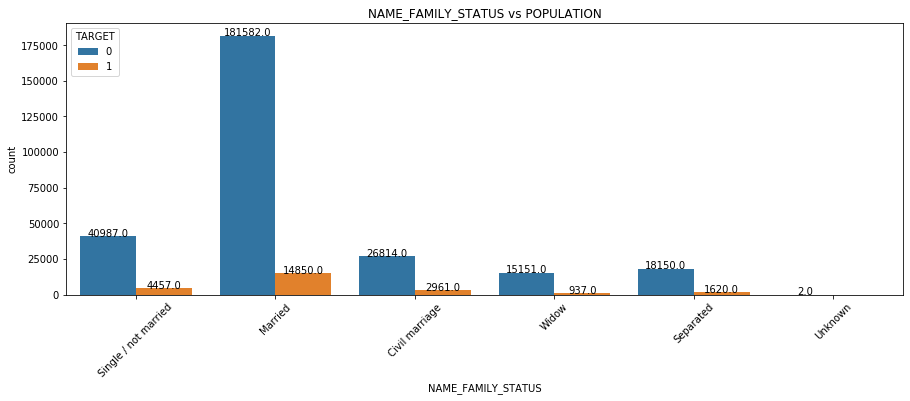

In [76]:
univariateplot('NAME_FAMILY_STATUS',15,5)

#### *Points to infer*

9.8% of single/unmarried people defaulted. 7.5% of those married defaulted. 9.9% of civil marriage population defaulted. 5.8% of those widowed defaulted. 8.1% of those separated defaulted. 

Single people defaulted often followed by separated people. 

#### Does housing type affect default ? 

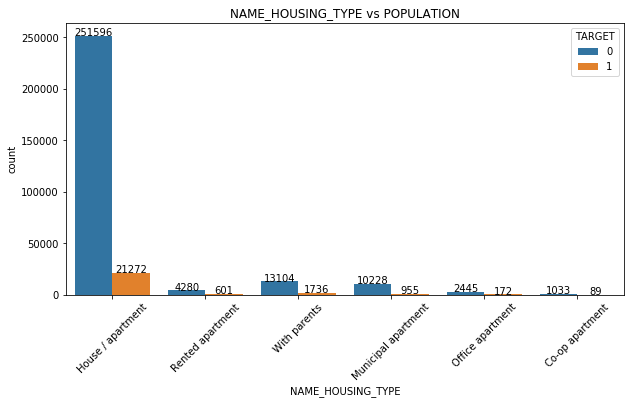

In [77]:
univariateplot("NAME_HOUSING_TYPE",10,5)

#### *Points to infer*

7.7% of those who live in house/apartment defaulted. 

1.2% of those in rented apartment defaulted. 

1.1% of those who live with parents defaulted. 

8.5% of those who live in municipal apartment defaulted. 

6.5% of those living in office apartment defaulted. 

7.9% of those in co-op apartments defaulted. 

Those who live in municipal apartments and co-op apartments defaulted more. Rented and those who lived with parents defaulted less. 

#### Does occupation type affect default ?

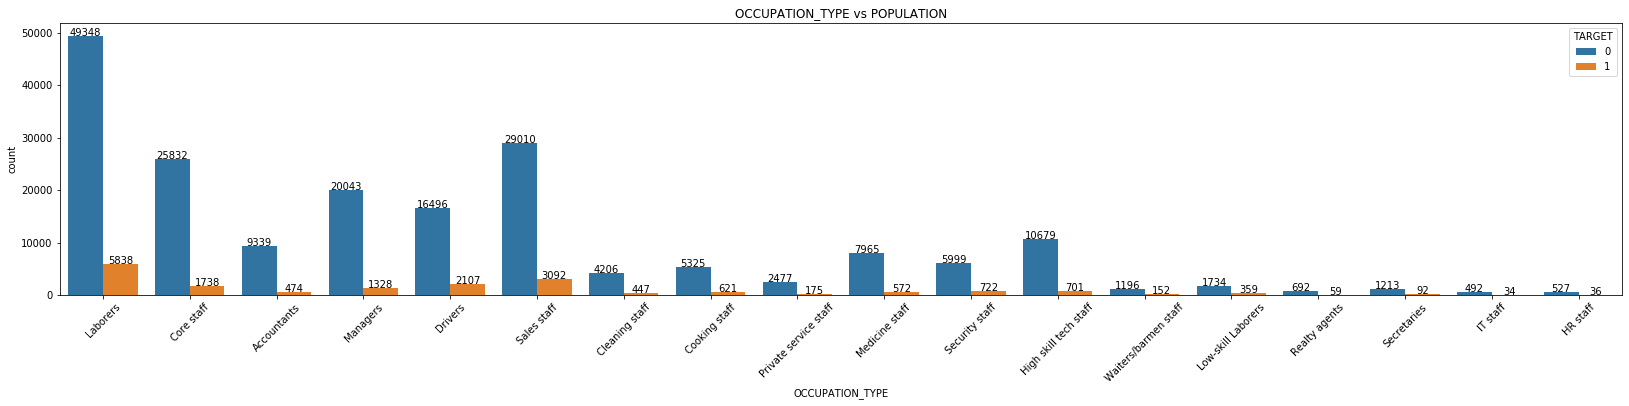

In [78]:
univariateplot('OCCUPATION_TYPE',28,5)

#### *Points to infer*

10.2% of labourers defaulted. 11.3% of drivers defaulted. 9.6% of sales staff defaulted. 11.2%of cleaning staff defaulted. 10.4% of cooking staff defaulted. 10.7% of security staff defaulted. 17.1% of low skill labourers defaulted. 11.2% of hi-tech skill staff defaulted. 

Low Skill labourers defaulted the most. 

#### Does the application process start day affect the default ? 

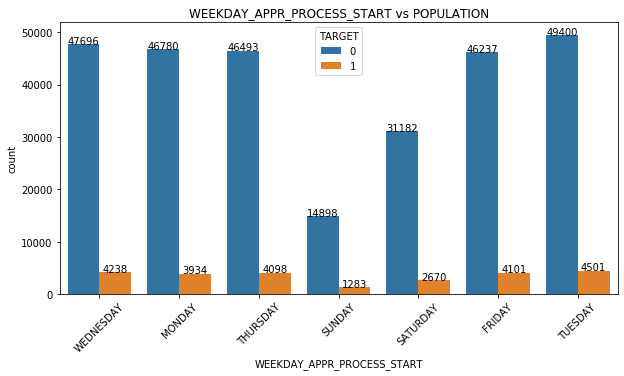

In [79]:
univariateplot('WEEKDAY_APPR_PROCESS_START',10,5)

#### *Points to infer*

On all days of the week, the default percentage seems to be around 8%.

#### Credit range affects default or not ?

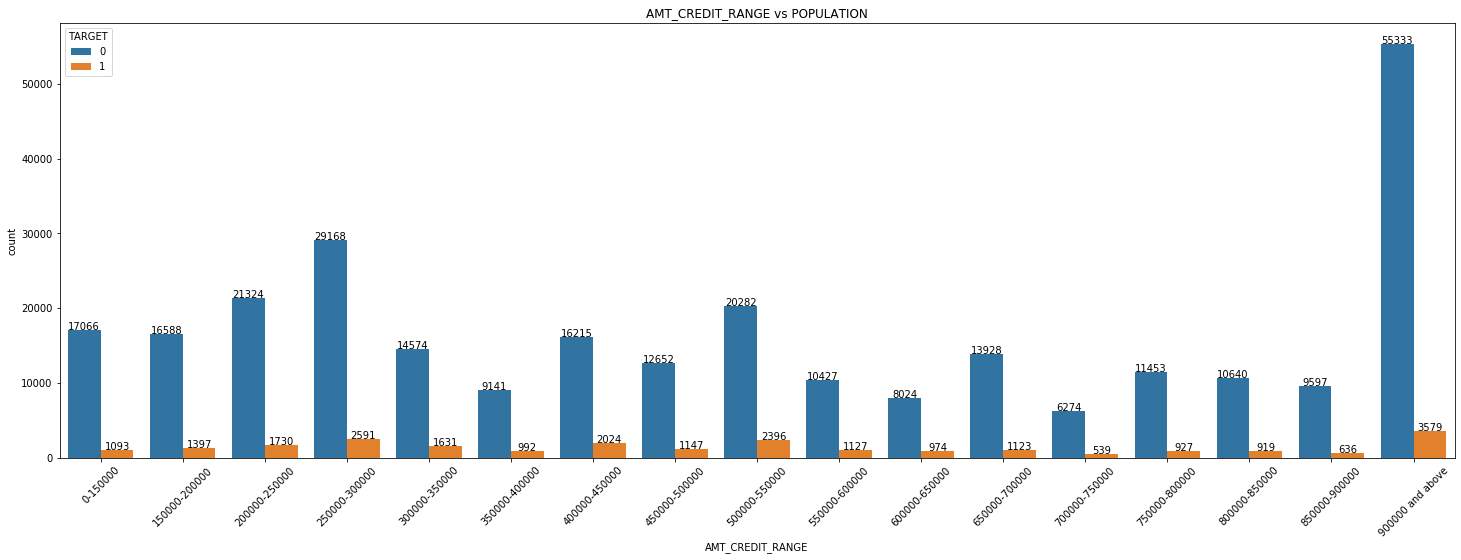

In [80]:
univariateplot('AMT_CREDIT_RANGE',25,8)

#### *Points to infer*
5.9% of Those in the highest credit range defaulted. 6% of lowest credit range population defaulted. This parameter doesnt follow a pattern wrt to default.  

### Univariate Analysis on the split dataframes

### Univariate analysis on dataframe of target 1 i.e. with defaulters

In [81]:
def univariateplot1(column,l,b):

    plt.figure(figsize=(l,b))
    ax = sns.countplot(x=column,hue='TARGET',data=dfapp_1)
    title = column + ' vs POPULATION'
    ax.set(title= title)
    plt.xticks(rotation = 45)
    
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2,
                height + 10,
                format(height),
                ha="center")
        
    
    

#### Gender Vs Default

F    0.570796
M    0.429204
Name: CODE_GENDER, dtype: float64

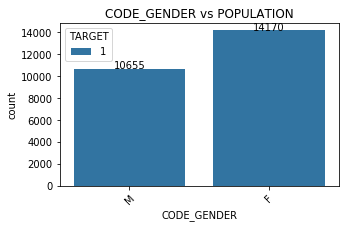

In [82]:
univariateplot1('CODE_GENDER',5,3)
plt.savefig("Gender1")
dfapp_1.CODE_GENDER.value_counts(normalize = True)

#### *Points to infer*
57% of defaulters are females. 

Cash loans         0.935388
Revolving loans    0.064612
Name: NAME_CONTRACT_TYPE, dtype: float64

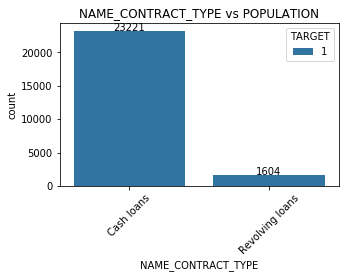

In [83]:
univariateplot1('NAME_CONTRACT_TYPE',5,3)
plt.savefig('Contract1')
dfapp_1.NAME_CONTRACT_TYPE.value_counts(normalize = True)

#### *Points to infer*
93% of defaulters are those with cash loans. 

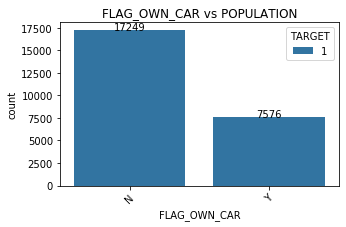

In [84]:
univariateplot1('FLAG_OWN_CAR',5,3)

#### *Points to infer*
69% of defaulters dont own a car. 

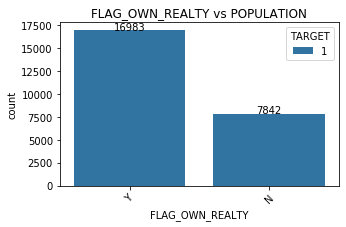

In [85]:
univariateplot1('FLAG_OWN_REALTY',5,3)

#### *Points to infer*
68% of defaulters donot own a realty

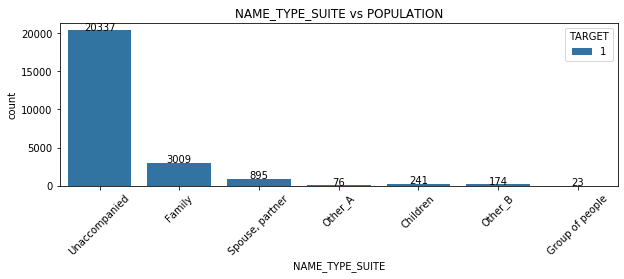

In [86]:
univariateplot1('NAME_TYPE_SUITE',10,3)

#### *Points to infer*
82% of the defaulters were unaccompanied. 

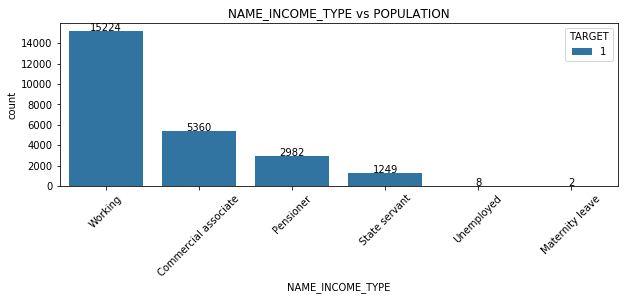

In [87]:
univariateplot1('NAME_INCOME_TYPE',10,3)

#### *Points to infer*
61% of defaulters are working employees. 

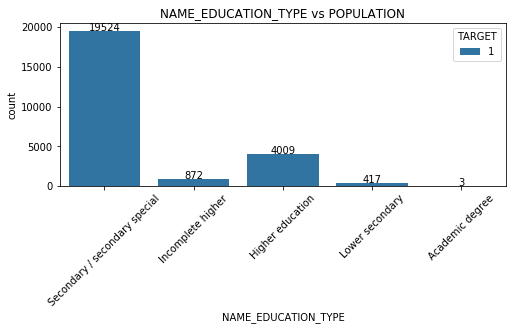

In [88]:
univariateplot1('NAME_EDUCATION_TYPE',8,3)

#### *Points to infer*
78% of defaulters were secondary or secondary special level education.

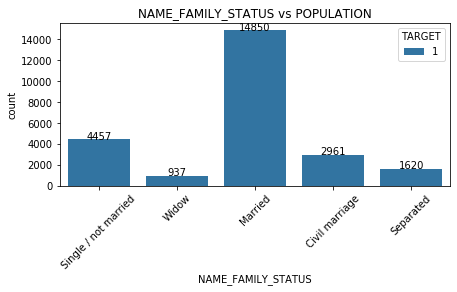

In [89]:
univariateplot1('NAME_FAMILY_STATUS',7,3)

#### *Points to infer*
59% of defaulters were married. 

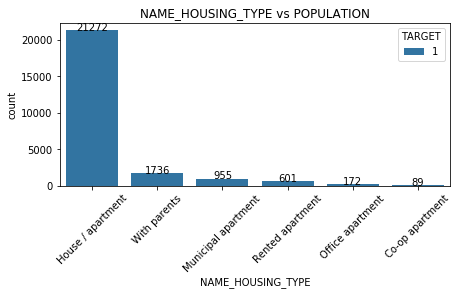

In [90]:
univariateplot1('NAME_HOUSING_TYPE',7,3)

#### *Points to infer*
85% of defaulters lived in a house/apartment. 6.9% defaulters lived with parents. 

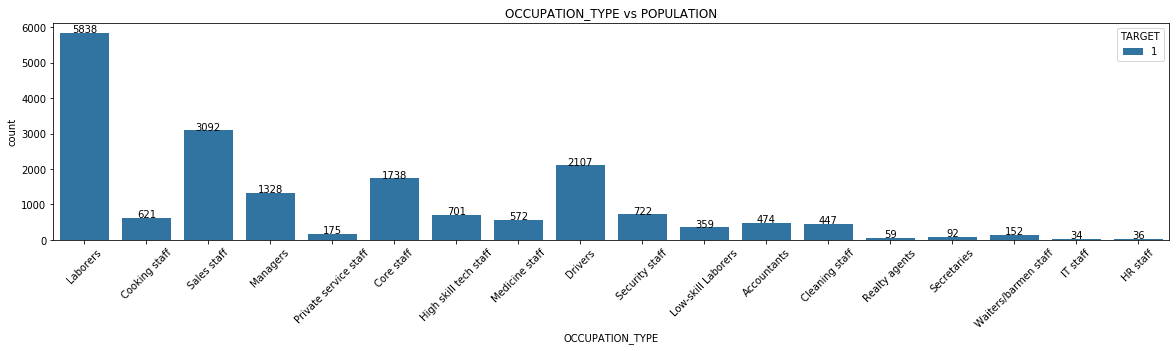

In [91]:
univariateplot1('OCCUPATION_TYPE',20,4)

#### *Points to infer*
31% of defaulters were labourers. 

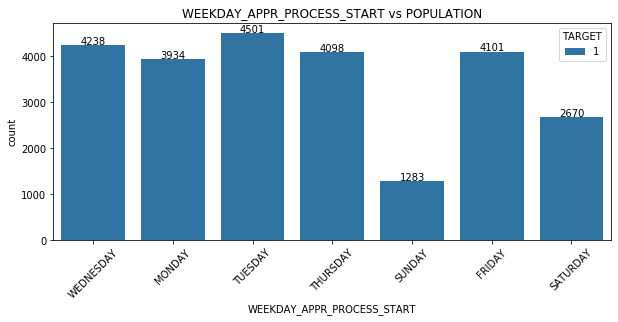

In [92]:
univariateplot1('WEEKDAY_APPR_PROCESS_START',10,4)

#### *Points to infer*
18% of defaulters started their application on Tuesday. 

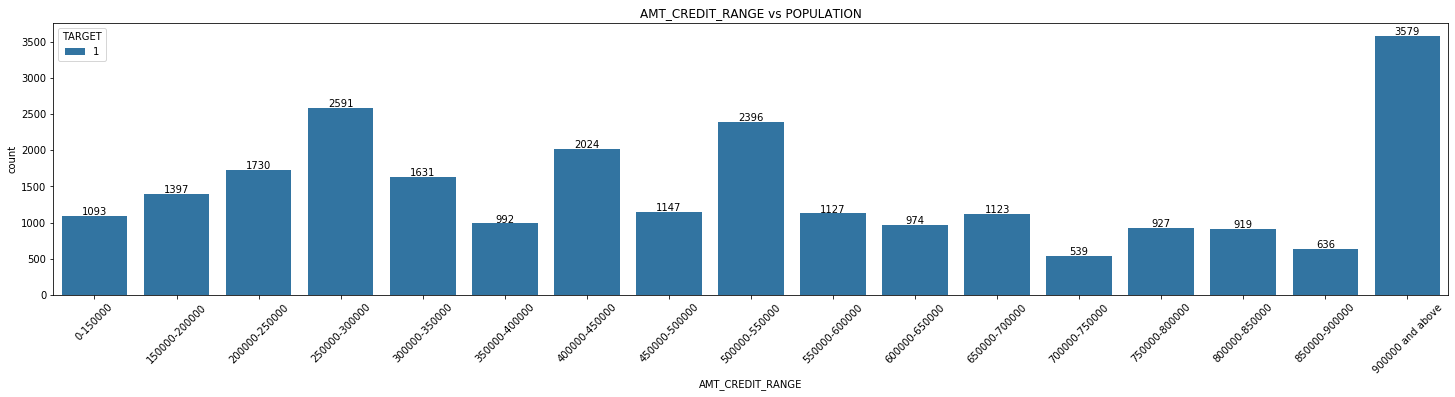

In [93]:
univariateplot1('AMT_CREDIT_RANGE',25,5)

#### *Points to infer*
Around 14% of defaulters had high credit range. 

#### Univariate analysis of Numerical variables in Target 1 dataframe

In [94]:
def numunivariate1(column,l,b,scale='linear') : 
    # boxplot for column vs target
    plt.figure(figsize=(l,b))
    ax = sns.boxplot(x='TARGET', y = column, data = dfapp_1)
    title = column+' vs Target'
    ax.set(title=title)
    if scale == 'log' :
        plt.yscale('log')
        ax.set(ylabel=column + '(Log Scale)')


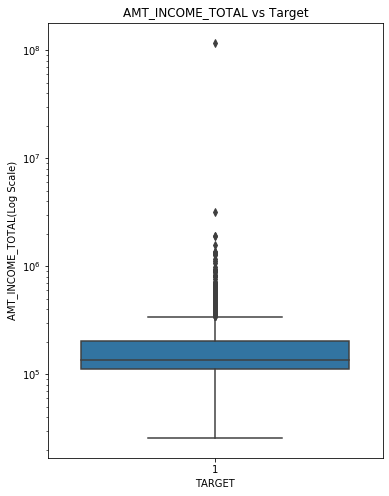

In [95]:
numunivariate1('AMT_INCOME_TOTAL',6,8,scale='log') 

#### *Points to infer*
Around 50% of those who defaulted belonged to the Amount income total of 1,35,000. 

In [96]:
dfapp_1.AMT_INCOME_TOTAL.quantile([0.5,0.7,0.9,0.95,0.99])

0.50    135000.0
0.70    180000.0
0.90    256500.0
0.95    315000.0
0.99    450000.0
Name: AMT_INCOME_TOTAL, dtype: float64

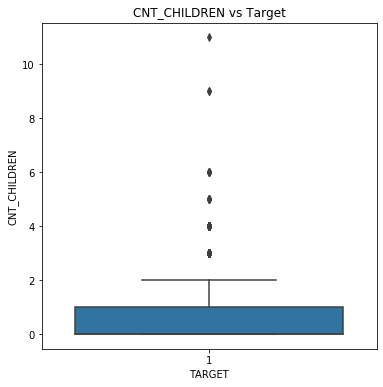

In [97]:
numunivariate1('CNT_CHILDREN',6,6,scale='linear') 

#### *Points to infer*
Defaulters fell in the range of 0-2 kids. 

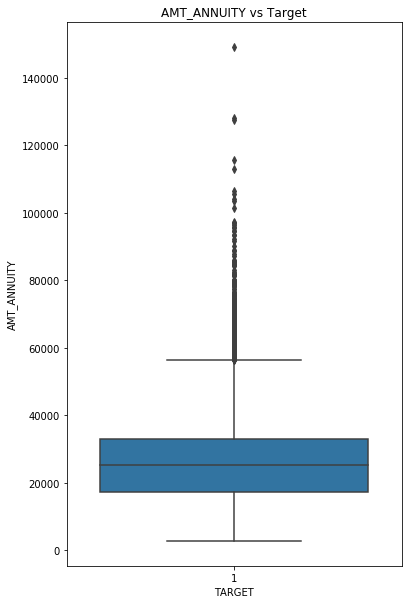

In [98]:
numunivariate1('AMT_ANNUITY',6,10,scale='linear') 
plt.savefig('annuity1')

#### *Points to infer*
50% of defaulters had an Amount Annunity of 30000. 

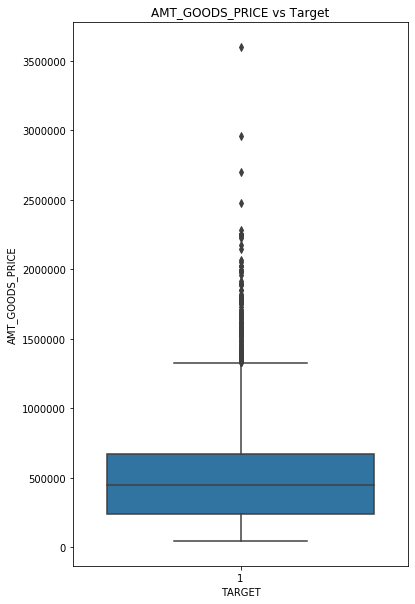

In [99]:
numunivariate1('AMT_GOODS_PRICE',6,10,scale='linear') 

#### *Points to infer*
50% of defaulters had a Amount goods price of around 500000.

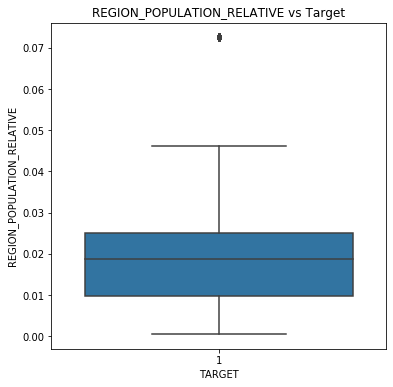

In [100]:
numunivariate1('REGION_POPULATION_RELATIVE',6,6,scale='linear') 

#### *Points to infer*
50% of defaulters were in the region population relative of 0.02. 

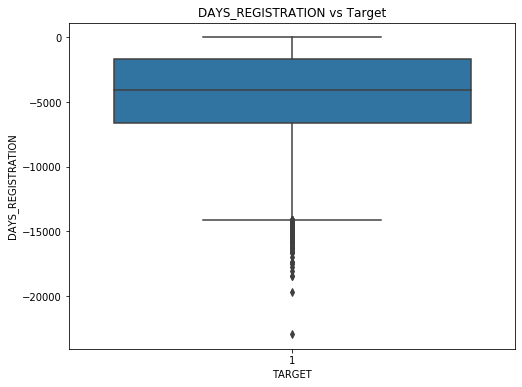

In [101]:
numunivariate1('DAYS_REGISTRATION',8,6,scale='linear') 

#### *Points to infer*
50% of defaulters had registered 10 days ago. 

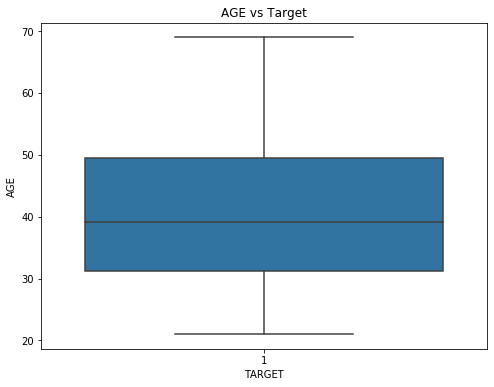

In [102]:

numunivariate1('AGE',8,6,scale='linear') 
plt.savefig('age1')

#### *Points to infer*

Median value of defaulters is around 40 years. 

### Bivariate Analysis of TARGET 1 dataframe  

#### Income Range Vs Gender 

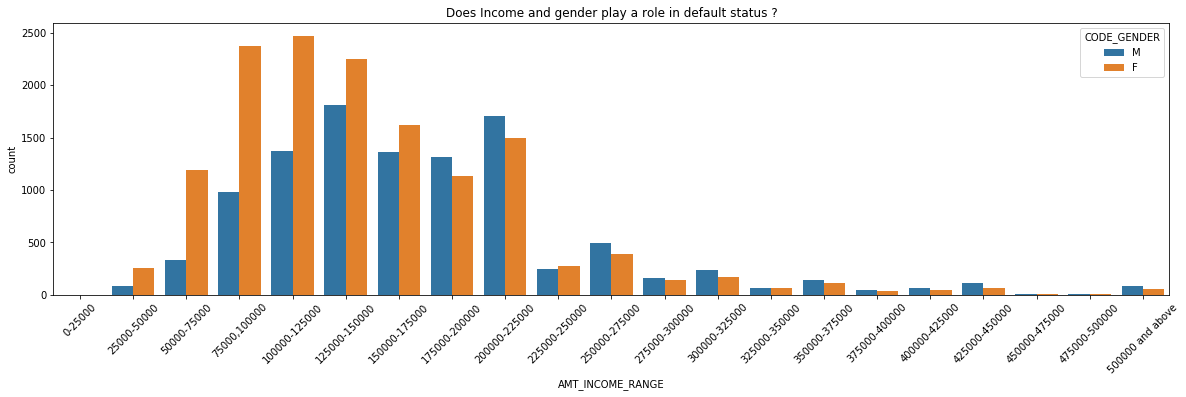

In [103]:
plt.figure(figsize = (20,5))
sns.countplot(x = 'AMT_INCOME_RANGE', hue = 'CODE_GENDER', data = dfapp_1)
plt.title('Does Income and gender play a role in default status ?')
plt.xticks(rotation = 45)
plt.savefig('incomegender1')

### *points to infer*

Females in the income range of 25000 to 200000 tend be defaulters. 

#### Does Contract and Education play a role in default status ?

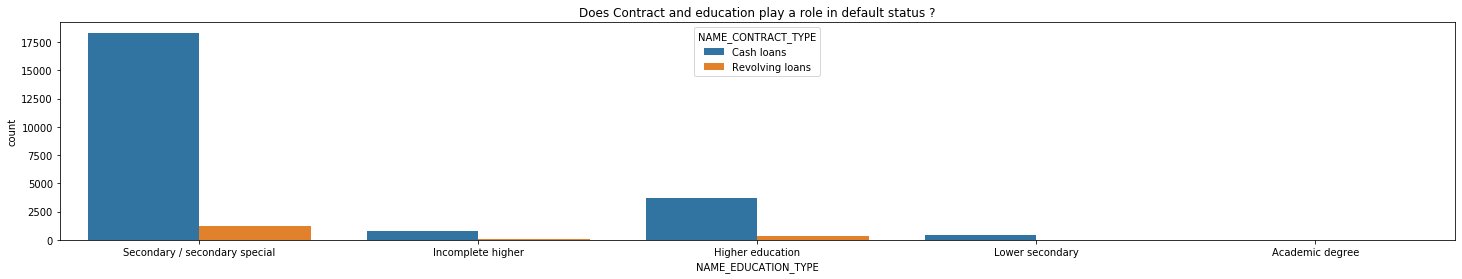

In [104]:
plt.figure(figsize = (25,4))
sns.countplot(x = 'NAME_EDUCATION_TYPE', hue = 'NAME_CONTRACT_TYPE', data = dfapp_1)
plt.title('Does Contract and education play a role in default status ?')
plt.xticks(rotation = 0)
plt.savefig('contracteducation1')

### *points to infer*
Those with cash Loans and secondary level education tend to default more. 

#### Income Type and education affect default ?

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

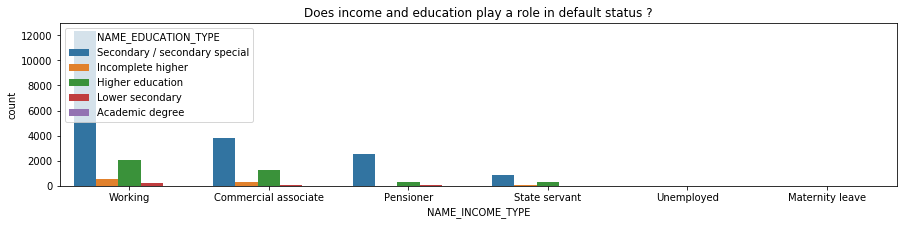

In [105]:
plt.figure(figsize = (15,3))
sns.countplot(x = 'NAME_INCOME_TYPE', hue = 'NAME_EDUCATION_TYPE', data = dfapp_1)
plt.title('Does income and education play a role in default status ?')
plt.xticks(rotation = 0)

### *points to infer*
Working and secondary education folks defaulted more. 

#### Does family status and income status impact default ?

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

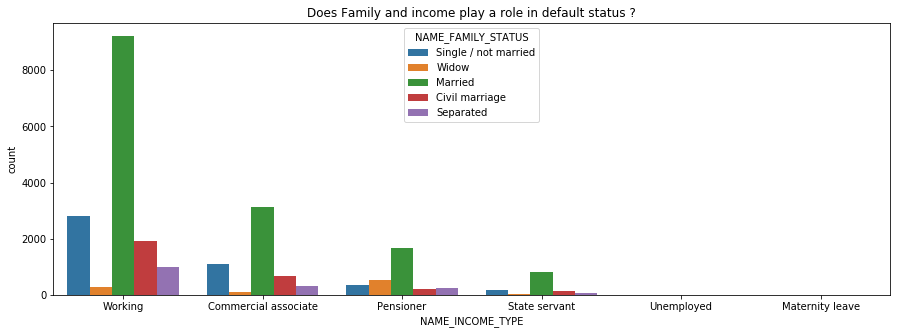

In [106]:
plt.figure(figsize = (15,5))
sns.countplot(x = 'NAME_INCOME_TYPE', hue = 'NAME_FAMILY_STATUS', data = dfapp_1)
plt.title('Does Family and income play a role in default status ?')
plt.xticks(rotation = 0)

### *points to infer*
Married and working tend to default more. 

#### Does Amount credit and education play a role in default ?

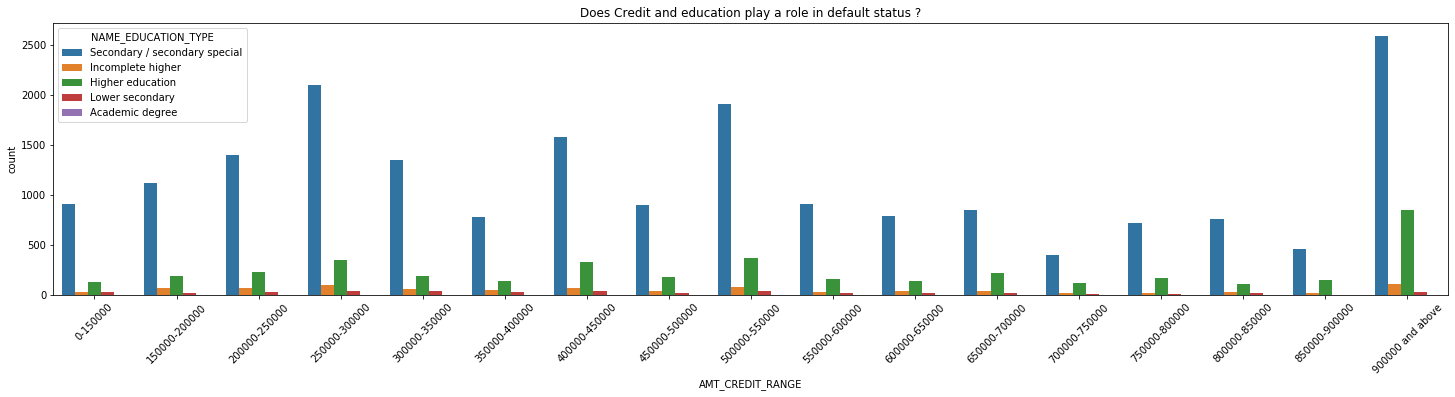

In [107]:
plt.figure(figsize = (25,5))
sns.countplot(x = 'AMT_CREDIT_RANGE', hue = 'NAME_EDUCATION_TYPE', data = dfapp_1)
plt.title('Does Credit and education play a role in default status ?')
plt.xticks(rotation = 45)
plt.savefig('creditedu1')

### *points to infer*
Those with high credit and secondary education tend to default more. 

#### Gender and education play a role in default ?

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

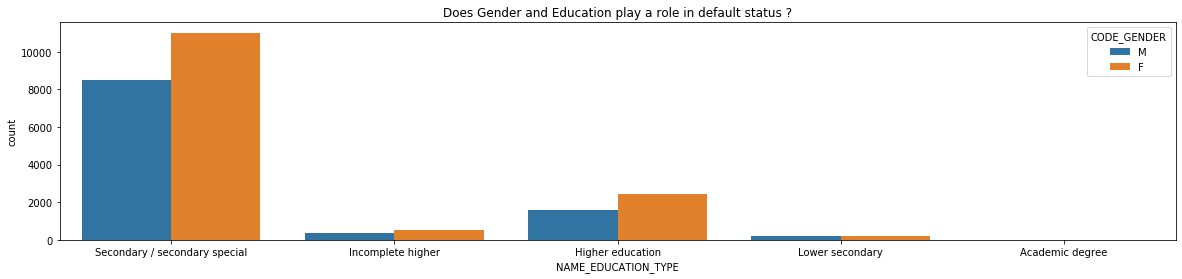

In [108]:
plt.figure(figsize = (20,4))
sns.countplot(x = 'NAME_EDUCATION_TYPE', hue = 'CODE_GENDER', data = dfapp_1)
plt.title('Does Gender and Education play a role in default status ?')
plt.xticks(rotation = 0)

### *points to infer*
Women with Secondary or higher education tend to default more. 

### Analysis with Target 0 Dataframe. Those who have not defaulted in the past. 

In [109]:
dfapp_0.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,ORGANIZATION_TYPE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AGE,AMT_INCOME_RANGE,AMT_CREDIT_RANGE
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,School,0.0,0.0,0.0,0.0,0.0,0.0,45.931507,250000-275000,900000 and above
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Government,0.0,0.0,0.0,0.0,0.0,0.0,52.180822,50000-75000,0-150000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,Business Entity Type 3,NaN,NaN,NaN,NaN,NaN,NaN,52.068493,125000-150000,300000-350000
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,Religion,0.0,0.0,0.0,0.0,0.0,0.0,54.608219,100000-125000,500000-550000
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,Other,0.0,0.0,0.0,0.0,1.0,1.0,46.413699,"75000,100000",450000-500000


In [110]:
def univariateplot0(column,l,b):

    plt.figure(figsize=(l,b))
    ax = sns.countplot(x=column,hue='TARGET',data=dfapp_0)
    title = column + ' vs POPULATION'
    ax.set(title= title)
    plt.xticks(rotation = 45)
    
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2,
                height + 10,
                format(height),
                ha="center")
    
    

#### Gender Vs Target

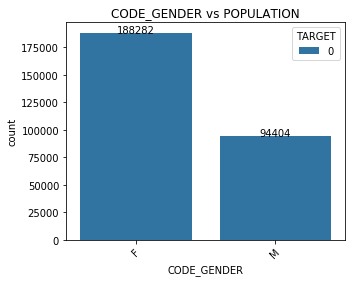

In [111]:
univariateplot0('CODE_GENDER',5,4)

### *points to infer*
66% of the non defaulters are women. 
From above, 57% of defaulters were women. 

Hence we may conclude that women tend to default less. 

#### Credit Vs Default

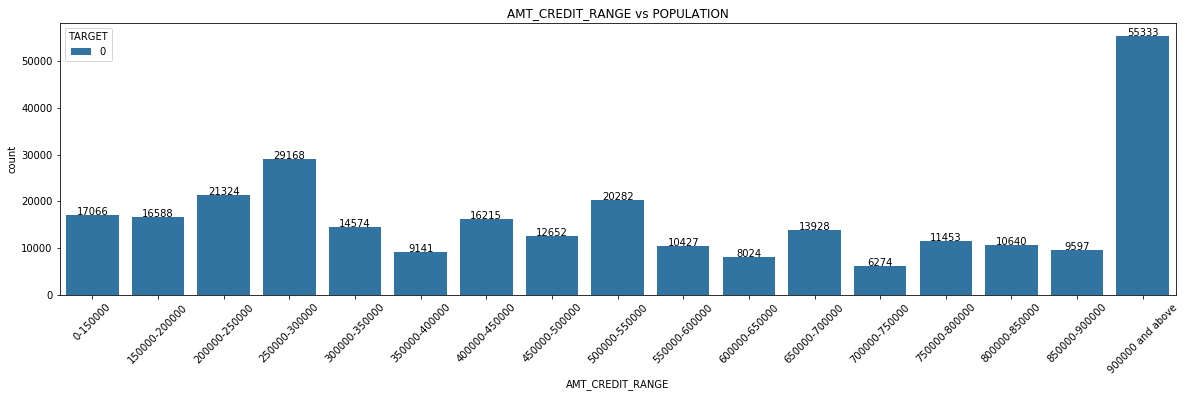

In [112]:
univariateplot0('AMT_CREDIT_RANGE',20,5)

### *points to infer*
19% of non-defaulters have high credit range. 
14% of defaulters have high credit range. 


#### Occupation vs Default

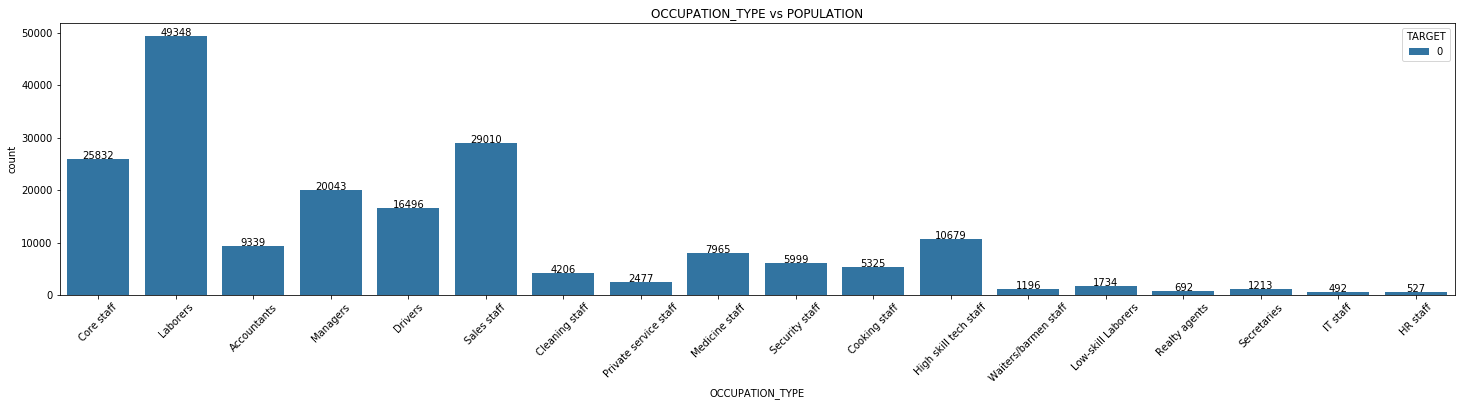

In [113]:
univariateplot0('OCCUPATION_TYPE',25,5)

### *points to infer*

25% of non defaulters are labourers. 31% of defaulters were labourers. 

15% are drivers followed by core staff. 

Labourers tend to default more. 

#### Housing Type vs default

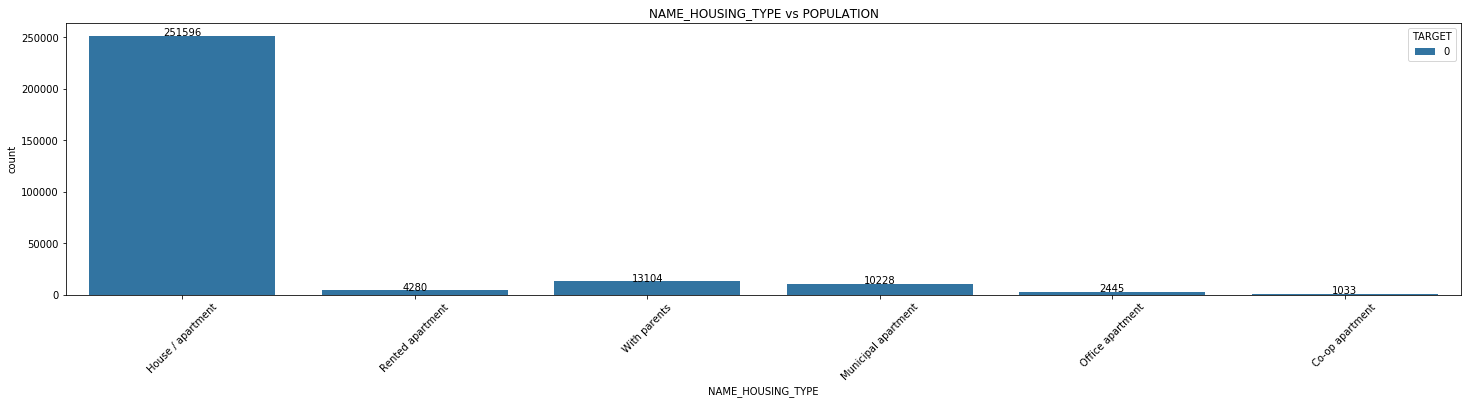

In [114]:
univariateplot0('NAME_HOUSING_TYPE',25,5)

#### *points to infer*

89% of non defaulters lived in house/apartment. 4.6% of non defaulters lived with their parents. 
85% of defaulters lived in a house/apartment. 6.9% defaulters lived with parents. 

#### Family status vs default

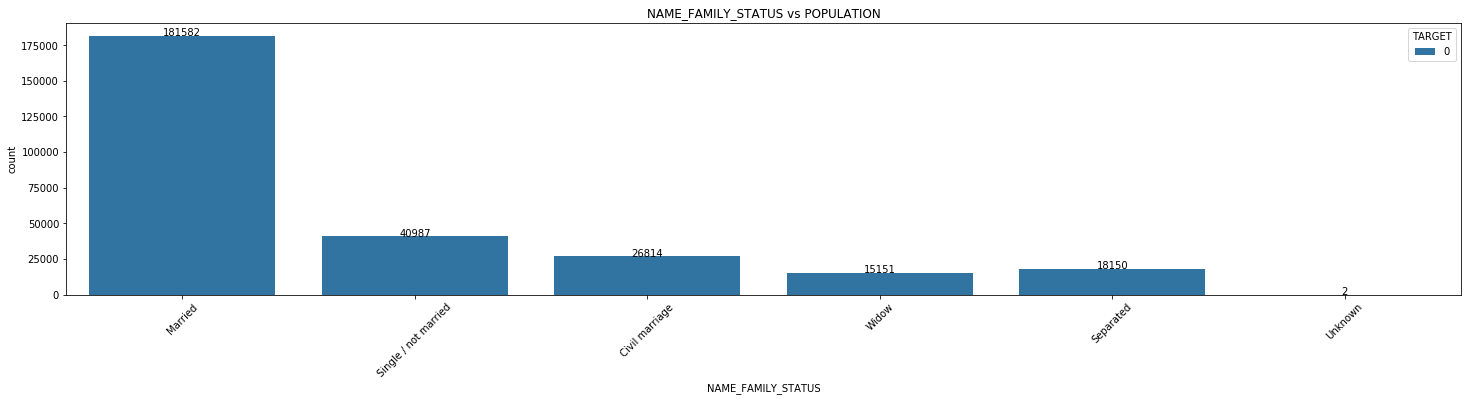

In [115]:
univariateplot0("NAME_FAMILY_STATUS",25,5)

#### *points to infer

64% of non-defualters were married. 59% of defaulters were married. 
Married folks tend to default less. 

#### Education vs default 

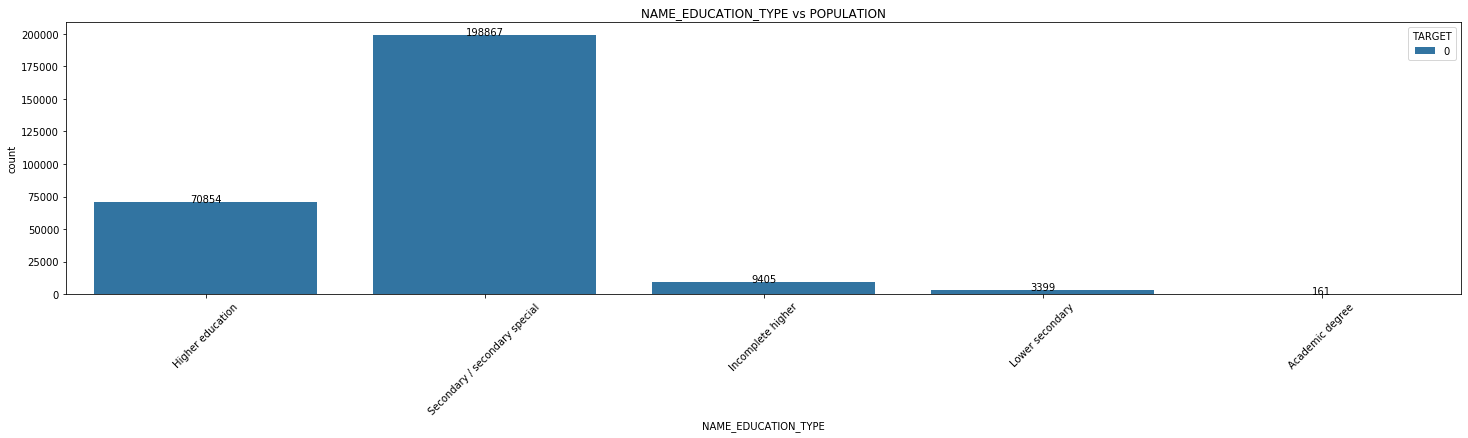

In [116]:
univariateplot0("NAME_EDUCATION_TYPE",25,5)

#### Points to infer
70% of non defaulters had secondary education. 
78% of defaulters had secondary education. 

#### Income vs default

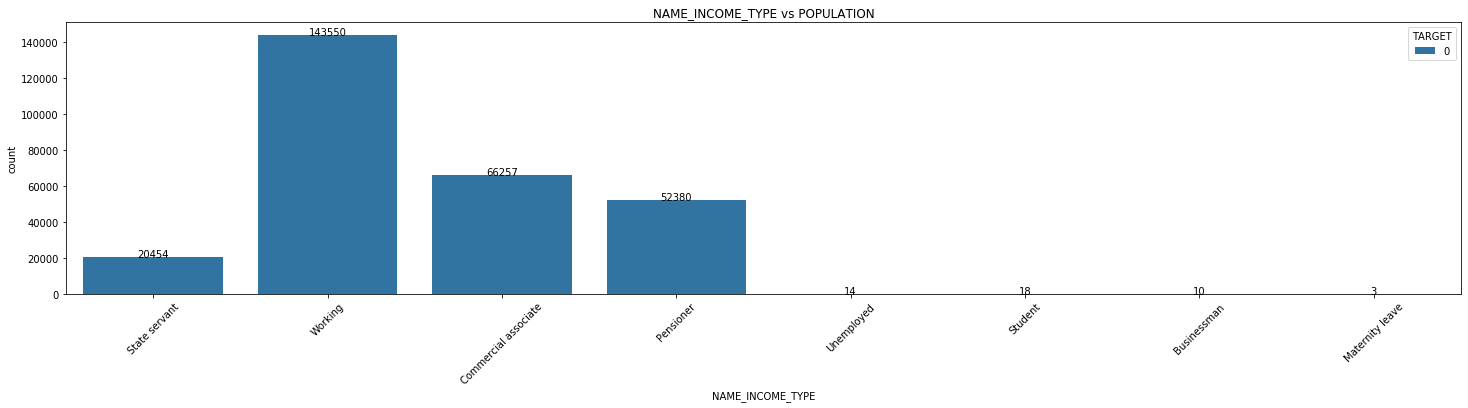

In [117]:
univariateplot0("NAME_INCOME_TYPE",25,5)

#### *points to infer*
50% of non-defaulters were working. 61% of defaulters are working employees.

#### Owning a car vs Default

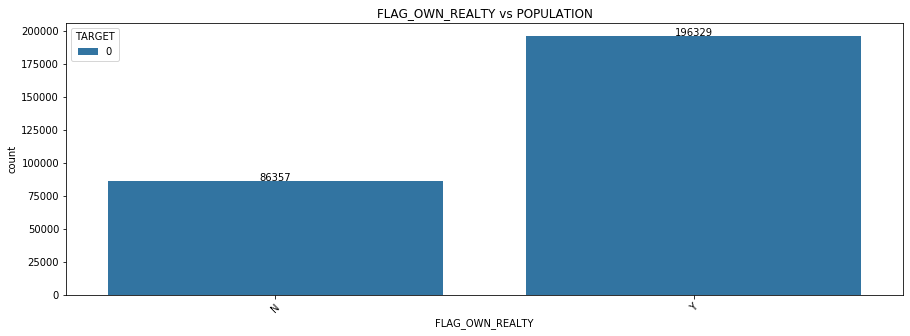

In [118]:
univariateplot0("FLAG_OWN_REALTY",15,5)

#### *points to infer*

69% of non-defaulters owned a realty. 68% of defaulters own a realty. 
No clear references can be made.

#### Owning a CAR vs default

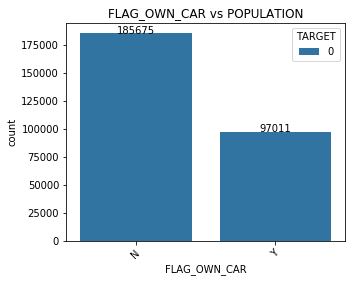

In [119]:
univariateplot0("FLAG_OWN_CAR",5,4)

#### *points to infer*

65% of non-defaulters didnot own a car. 69% of defaulters dont own a car. 30% of defaulters owned a car. 
CAR owners tend to default more. 

#### Contract vs default 

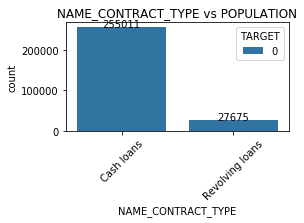

In [120]:
univariateplot0("NAME_CONTRACT_TYPE",4,2)

#### *points to infer*
90% of non-defaulters had cash loans, 93% of defaulters are those with cash loans.
6.4% of defaulters had revolving loans. 9.7% of non defaulters had revolving loans. 

### Analysis of numerical variables in Target 0 dataframe 

In [121]:
def numunivariate0(column,scale='linear') : 
    # boxplot for column vs target
    plt.figure(figsize=(8,6))
    ax = sns.boxplot(x='TARGET', y = column, data = dfapp_0)
    title = column+' vs Target'
    ax.set(title=title)
    if scale == 'log' :
        plt.yscale('log')
        ax.set(ylabel=column + '(Log Scale)')


#### AMOUNT ANNUITY vs default

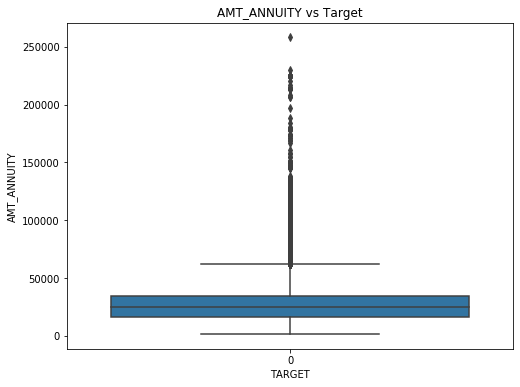

In [122]:
numunivariate0('AMT_ANNUITY', scale = 'linear')

#### point to infer
Median Amount annuity of nondefaulters is 25000. Median Amount annuity of defaulters is 30000. 

#### Goods price vs default

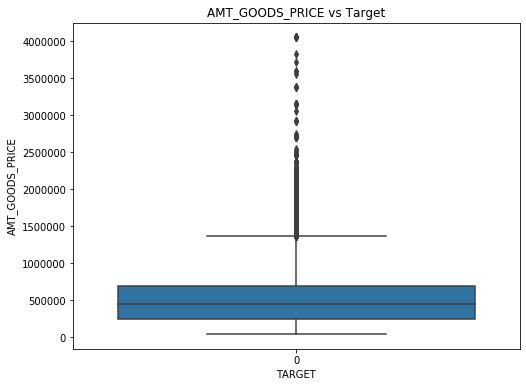

In [123]:
numunivariate0('AMT_GOODS_PRICE', scale = 'linear')

#### Points to infer.
No difference in amount goods price of defaulters and non-defaulters. 

#### Region Population relative Vs Default

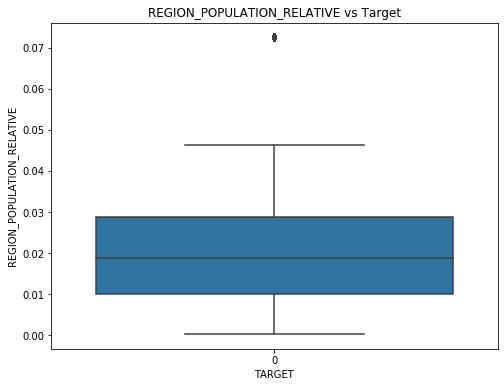

In [124]:
numunivariate0('REGION_POPULATION_RELATIVE', scale = 'linear')

No difference in region_population_relative between defaulters and non-defaulters. 

#### Days employed vs default 

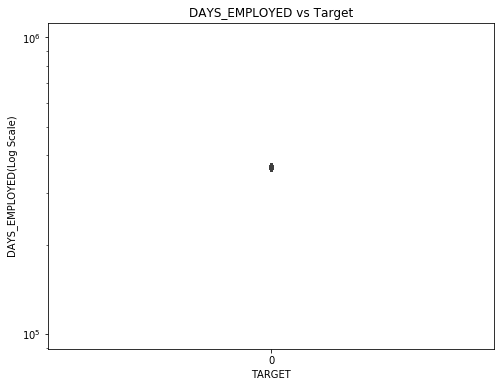

In [125]:
numunivariate0("DAYS_EMPLOYED", scale = 'log')

#### Days_registration vs default 

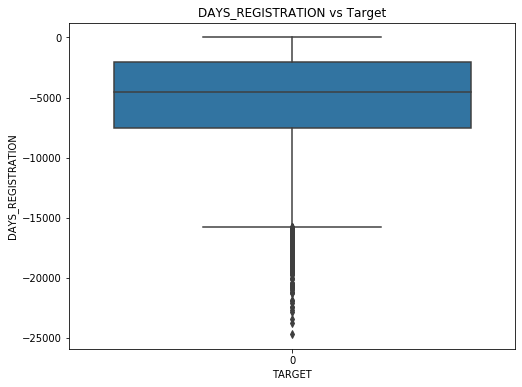

In [126]:
numunivariate0('DAYS_REGISTRATION', scale = 'linear')

C:\Users\Admin\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


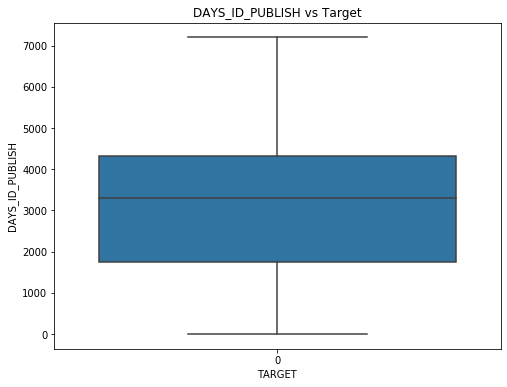

In [127]:
dfapp_0['DAYS_ID_PUBLISH'] = dfapp_0['DAYS_ID_PUBLISH'].apply(lambda x : x*(-1))
numunivariate0("DAYS_ID_PUBLISH", scale = 'linear')

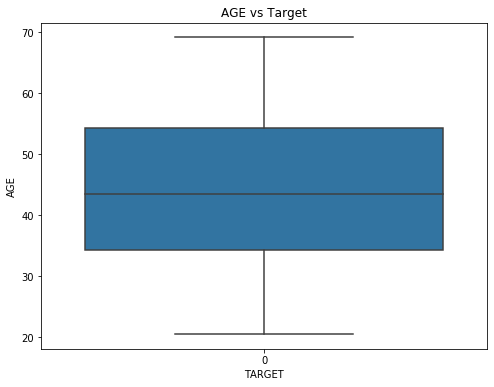

In [128]:
numunivariate0('AGE', scale = 'linear')

No difference in median value of defaulters and non-defaulters. 

### Bivariate analysis of Target 0 dataframe

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text xticklabel objects>)

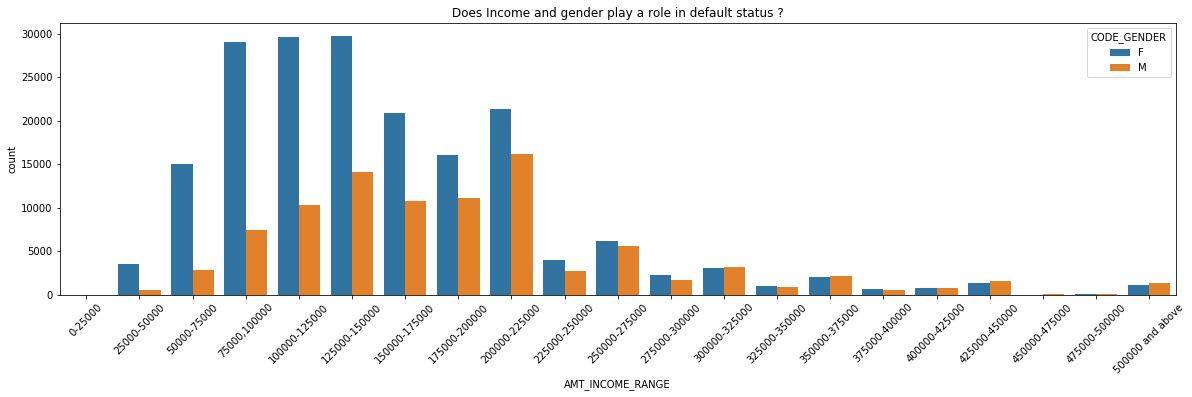

In [129]:
plt.figure(figsize = (20,5))
sns.countplot(x = 'AMT_INCOME_RANGE', hue = 'CODE_GENDER', data = dfapp_0)
plt.title('Does Income and gender play a role in default status ?')
plt.xticks(rotation = 45)

#### *points to infer*
Women in the income range of 50,000 to 150000 tend to default less than men. 

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

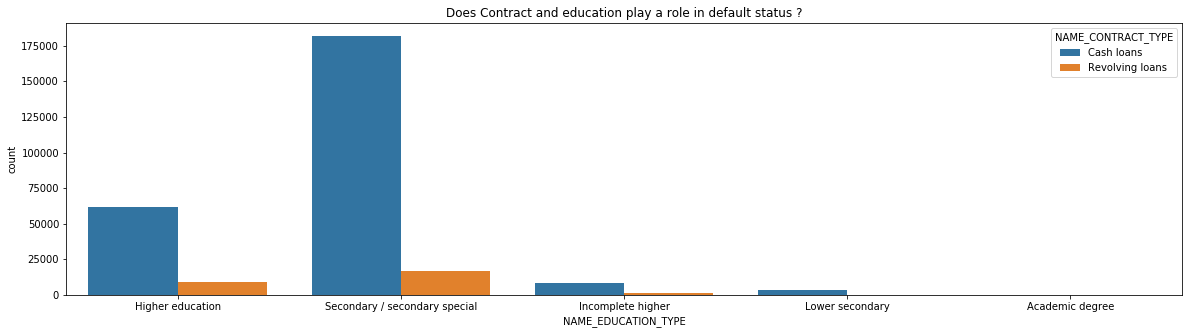

In [130]:
plt.figure(figsize = (20,5))
sns.countplot(x = 'NAME_EDUCATION_TYPE', hue = 'NAME_CONTRACT_TYPE', data = dfapp_0)
plt.title('Does Contract and education play a role in default status ?')
plt.xticks(rotation = 0)


#### *points to infer*
A significant section of Non defaulters have secondary education and cash loans.  

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

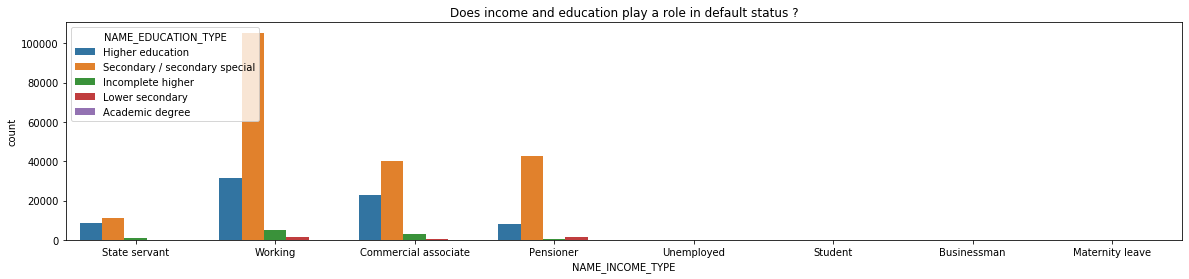

In [131]:
plt.figure(figsize = (20,4))
sns.countplot(x = 'NAME_INCOME_TYPE', hue = 'NAME_EDUCATION_TYPE', data = dfapp_0)
plt.title('Does income and education play a role in default status ?')
plt.xticks(rotation = 0)

A significant section of non defaulters are working and secondary education. 

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

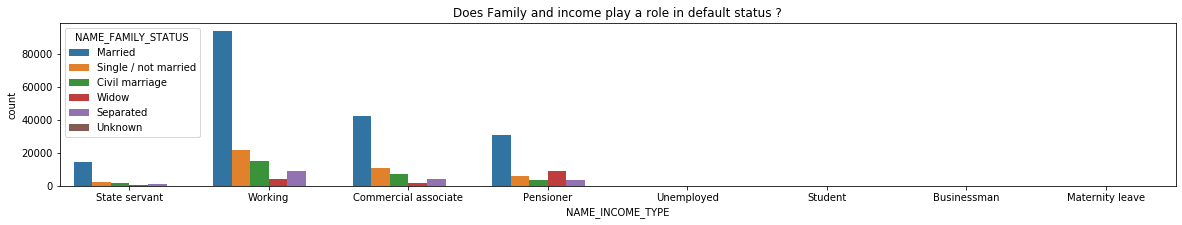

In [132]:
plt.figure(figsize = (20,3))
sns.countplot(x = 'NAME_INCOME_TYPE', hue = 'NAME_FAMILY_STATUS', data = dfapp_0)
plt.title('Does Family and income play a role in default status ?')
plt.xticks(rotation = 0)

#### *points to infer*
Non defaulters are mostly in the category of married and working. 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text xticklabel objects>)

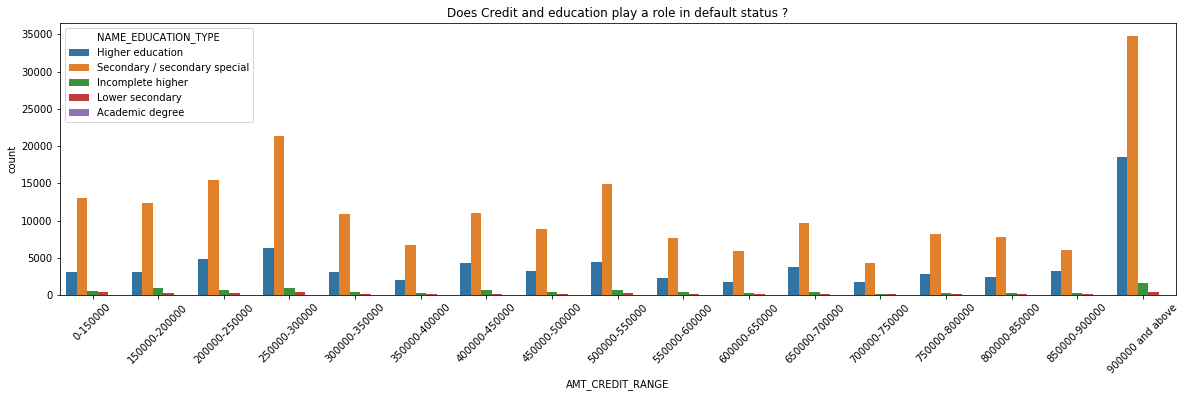

In [133]:
plt.figure(figsize = (20,5))
sns.countplot(x = 'AMT_CREDIT_RANGE', hue = 'NAME_EDUCATION_TYPE', data = dfapp_0)
plt.title('Does Credit and education play a role in default status ?')
plt.xticks(rotation = 45)

#### *points to infer*
Non defaulters fall in the category of credit range 850000-900000 and secondary educated. 

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

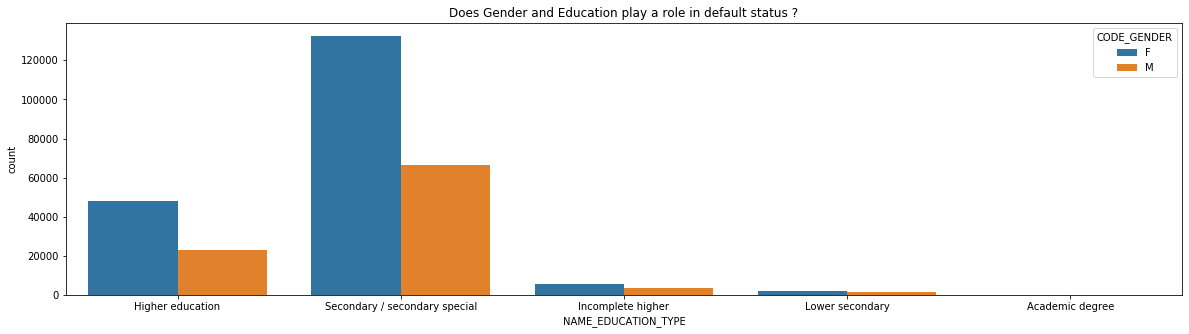

In [134]:
plt.figure(figsize = (20,5))
sns.countplot(x = 'NAME_EDUCATION_TYPE', hue = 'CODE_GENDER', data = dfapp_0)
plt.title('Does Gender and Education play a role in default status ?')
plt.xticks(rotation = 0)

#### *points to infer*
Women with secondary education and higher education form the highest no. of defaulters. 

#### MERGING THE TWO DATAFRAMES 

In [135]:
#Merging Dataframes 

dfmerged = pd.merge(left=dfapp,right=dfprevious,how='inner',on='SK_ID_CURR', suffixes='_x')
dfmerged.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_,AMT_ANNUITY_,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0
4,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,XNA,48.0,low_normal,Cash X-Sell: low,365243.0,-151.0,1259.0,-151.0,-143.0,0.0


In [136]:
dfmerged.shape

(887347, 76)

In [137]:
dfmerged.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_', 'AMT_ANNUITY_', 'AMT_GOODS_PRICE_', 'NAME_TYPE_SUITE_',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START_',
       'HOUR_APPR_PROCESS_START_', 'REG_REGION_NOT_LIVE_REGION',
       'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY',
       'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
       'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'AGE',
       'AMT_INCOME_RANGE', 'AMT_CREDIT_RANGE', 'SK_ID_PREV

In [138]:
dfmerged.drop(['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY',
       'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON',
       'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR'], axis=1, inplace = True)

In [139]:
dropcolumns = dfmerged.columns[dfmerged.isnull().sum()/len(dfmerged) > 0.30].tolist() ##list of columns that have null values 
dropcolumns

['OCCUPATION_TYPE',
 'AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITEx',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [140]:
dfmerged.drop(['OCCUPATION_TYPE',
 'AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITEx'], axis = 1, inplace = True)

In [141]:
dfmerged.shape

(887347, 64)

In [142]:
dfmerged.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_', 'AMT_ANNUITY_', 'AMT_GOODS_PRICE_', 'NAME_TYPE_SUITE_',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       'WEEKDAY_APPR_PROCESS_START_', 'HOUR_APPR_PROCESS_START_',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'AGE', 'AMT_INCOME_RANGE', 'AMT_CREDIT_RANGE',
       'SK_ID_PREV', 'NAME_CONTRACT_TYPEx', 'AMT_ANNUITYx', 'AMT_APPLICATION',
       'AMT_CREDITx', 'AMT_GOODS_PRICEx', 'WEEKDAY_APPR_PROCESS_STARTx',
       'HOUR_APPR_PROCESS_STARTx', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAS

In [143]:
dfmerged.drop(['NAME_TYPE_SUITE_','FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN','DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'WEEKDAY_APPR_PROCESS_START_', 'HOUR_APPR_PROCESS_START_',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','WEEKDAY_APPR_PROCESS_STARTx',
       'HOUR_APPR_PROCESS_STARTx', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NFLAG_LAST_APPL_IN_DAY','CHANNEL_TYPE',
       'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'], axis = 1, inplace = True)

In [144]:
dfmerged.shape

(887347, 33)

In [145]:
#Splitting the data based on the Target variable and performing Univariate and Bivariate analysis. a=Target 0 and b = Target 1
dfapp2a=dfmerged[dfmerged['TARGET']==0]
dfapp2b=dfmerged[dfmerged['TARGET']==1]

## Correlation 

In [146]:
pd.set_option('display.max_rows',1225)
corra=dfapp2a.corr()

In [147]:
corra=corra.where(np.triu(np.ones(corra.shape),k=1).astype(np.bool))
corra=corra.unstack().reset_index()
corra.head()

,level_0,level_1,0
0,SK_ID_CURR,SK_ID_CURR,NaN
1,SK_ID_CURR,TARGET,NaN
2,SK_ID_CURR,AMT_INCOME_TOTAL,NaN
3,SK_ID_CURR,AMT_CREDIT_,NaN
4,SK_ID_CURR,AMT_ANNUITY_,NaN


In [148]:
corra.columns=['VAR1','VAR2','Correlation']
corra.head()

,VAR1,VAR2,Correlation
0,SK_ID_CURR,SK_ID_CURR,NaN
1,SK_ID_CURR,TARGET,NaN
2,SK_ID_CURR,AMT_INCOME_TOTAL,NaN
3,SK_ID_CURR,AMT_CREDIT_,NaN
4,SK_ID_CURR,AMT_ANNUITY_,NaN


In [149]:
corra.dropna(subset = ['Correlation'], inplace = True)


In [150]:
corra['Correlation']=round(corra['Correlation'],2)
corra['Correlation']=corra['Correlation'].abs()
corra


,VAR1,VAR2,Correlation
30,AMT_INCOME_TOTAL,SK_ID_CURR,0.01
45,AMT_CREDIT_,SK_ID_CURR,0.00
47,AMT_CREDIT_,AMT_INCOME_TOTAL,0.32
60,AMT_ANNUITY_,SK_ID_CURR,0.00
62,AMT_ANNUITY_,AMT_INCOME_TOTAL,0.40
63,AMT_ANNUITY_,AMT_CREDIT_,0.76
75,AMT_GOODS_PRICE_,SK_ID_CURR,0.00
77,AMT_GOODS_PRICE_,AMT_INCOME_TOTAL,0.32
78,AMT_GOODS_PRICE_,AMT_CREDIT_,0.99
79,AMT_GOODS_PRICE_,AMT_ANNUITY_,0.76


In [151]:
corra.sort_values(by='Correlation',ascending=False)
corra


,VAR1,VAR2,Correlation
30,AMT_INCOME_TOTAL,SK_ID_CURR,0.01
45,AMT_CREDIT_,SK_ID_CURR,0.00
47,AMT_CREDIT_,AMT_INCOME_TOTAL,0.32
60,AMT_ANNUITY_,SK_ID_CURR,0.00
62,AMT_ANNUITY_,AMT_INCOME_TOTAL,0.40
63,AMT_ANNUITY_,AMT_CREDIT_,0.76
75,AMT_GOODS_PRICE_,SK_ID_CURR,0.00
77,AMT_GOODS_PRICE_,AMT_INCOME_TOTAL,0.32
78,AMT_GOODS_PRICE_,AMT_CREDIT_,0.99
79,AMT_GOODS_PRICE_,AMT_ANNUITY_,0.76


In [152]:
pd.set_option('display.max_rows',1225)
corrb=dfapp2b.corr()

In [153]:
corrb=corrb.where(np.triu(np.ones(corrb.shape),k=1).astype(np.bool))
corrb=corrb.unstack().reset_index()
corrb.columns=['VAR1','VAR2','Correlation']

In [154]:
corrb.dropna(subset = ['Correlation'], inplace = True)
corrb['Correlation']=round(corrb['Correlation'],2)
corrb['Correlation']=corrb['Correlation'].abs()
corrb.sort_values(by='Correlation',ascending=False)

,VAR1,VAR2,Correlation
127,AGE,DAYS_BIRTH,1.00
206,AMT_GOODS_PRICEx,AMT_APPLICATION,1.00
207,AMT_GOODS_PRICEx,AMT_CREDITx,0.99
78,AMT_GOODS_PRICE_,AMT_CREDIT_,0.98
191,AMT_CREDITx,AMT_APPLICATION,0.97
205,AMT_GOODS_PRICEx,AMT_ANNUITYx,0.84
190,AMT_CREDITx,AMT_ANNUITYx,0.84
175,AMT_APPLICATION,AMT_ANNUITYx,0.82
63,AMT_ANNUITY_,AMT_CREDIT_,0.75
79,AMT_GOODS_PRICE_,AMT_ANNUITY_,0.75


In [155]:
corrb=corrb[corrb['Correlation']>0.5].sort_values(by='Correlation',ascending=False)

corrb


,VAR1,VAR2,Correlation
127,AGE,DAYS_BIRTH,1.00
206,AMT_GOODS_PRICEx,AMT_APPLICATION,1.00
207,AMT_GOODS_PRICEx,AMT_CREDITx,0.99
78,AMT_GOODS_PRICE_,AMT_CREDIT_,0.98
191,AMT_CREDITx,AMT_APPLICATION,0.97
190,AMT_CREDITx,AMT_ANNUITYx,0.84
205,AMT_GOODS_PRICEx,AMT_ANNUITYx,0.84
175,AMT_APPLICATION,AMT_ANNUITYx,0.82
63,AMT_ANNUITY_,AMT_CREDIT_,0.75
79,AMT_GOODS_PRICE_,AMT_ANNUITY_,0.75


In [156]:
corra=corra[corra['Correlation']>0.5].sort_values(by='Correlation',ascending=False)

corra


,VAR1,VAR2,Correlation
127,AGE,DAYS_BIRTH,1.00
206,AMT_GOODS_PRICEx,AMT_APPLICATION,1.00
78,AMT_GOODS_PRICE_,AMT_CREDIT_,0.99
207,AMT_GOODS_PRICEx,AMT_CREDITx,0.99
191,AMT_CREDITx,AMT_APPLICATION,0.98
190,AMT_CREDITx,AMT_ANNUITYx,0.82
205,AMT_GOODS_PRICEx,AMT_ANNUITYx,0.82
175,AMT_APPLICATION,AMT_ANNUITYx,0.81
63,AMT_ANNUITY_,AMT_CREDIT_,0.76
79,AMT_GOODS_PRICE_,AMT_ANNUITY_,0.76


In [157]:
plt.savefig('corrb.png')

<Figure size 432x288 with 0 Axes>

#### Univariate analysis of merged dataframe

In [158]:
def univariateplotm(column, l, b):

    plt.figure(figsize=(l,b))
    ax = sns.countplot(y=column,hue='NAME_CONTRACT_STATUS',data=dfmerged)
    title = column + ' vs POPULATION'
    ax.set(title= title)
    plt.xticks(rotation = 0)
    
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2,
                height + 10,
                format(height),
                ha="center")


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


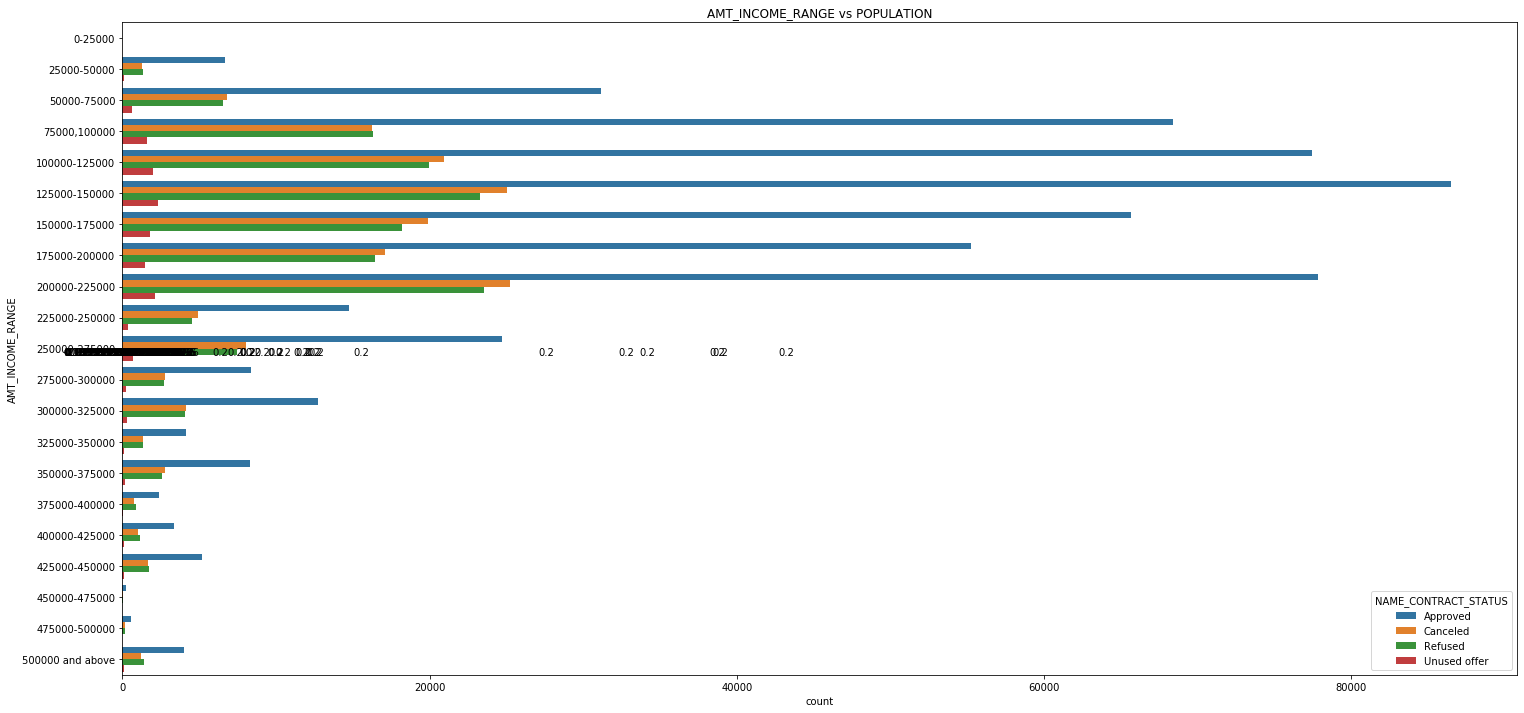

In [159]:
univariateplotm('AMT_INCOME_RANGE', 25,12)
import warnings
warnings.filterwarnings('ignore')

Most of the approved loans are in the category of 50000 to 225000
At 30000-325000, refused and cancelled loans are almost 50% as those of approved. 

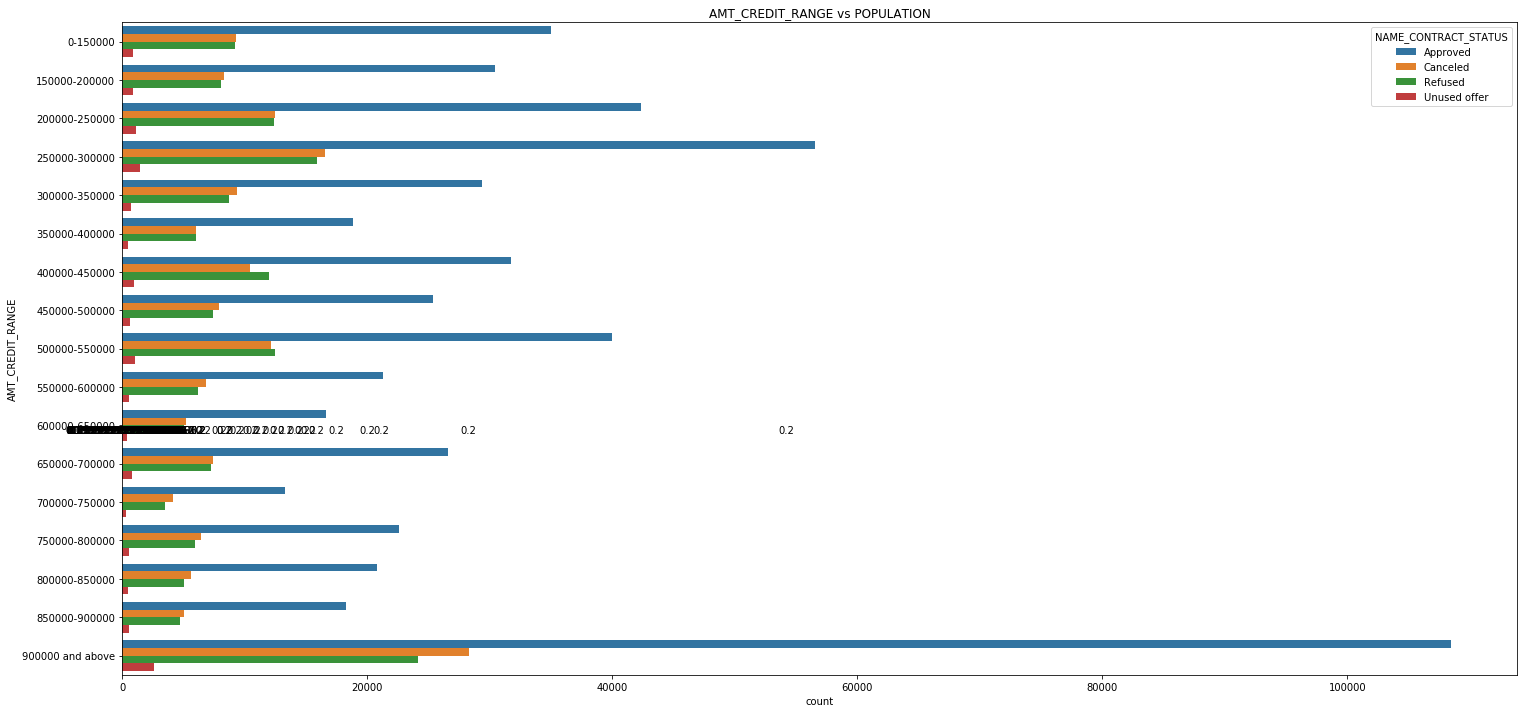

In [160]:
univariateplotm('AMT_CREDIT_RANGE',25,12)

Credit range of 900000 or above has the maximum no. of approved loans. 

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


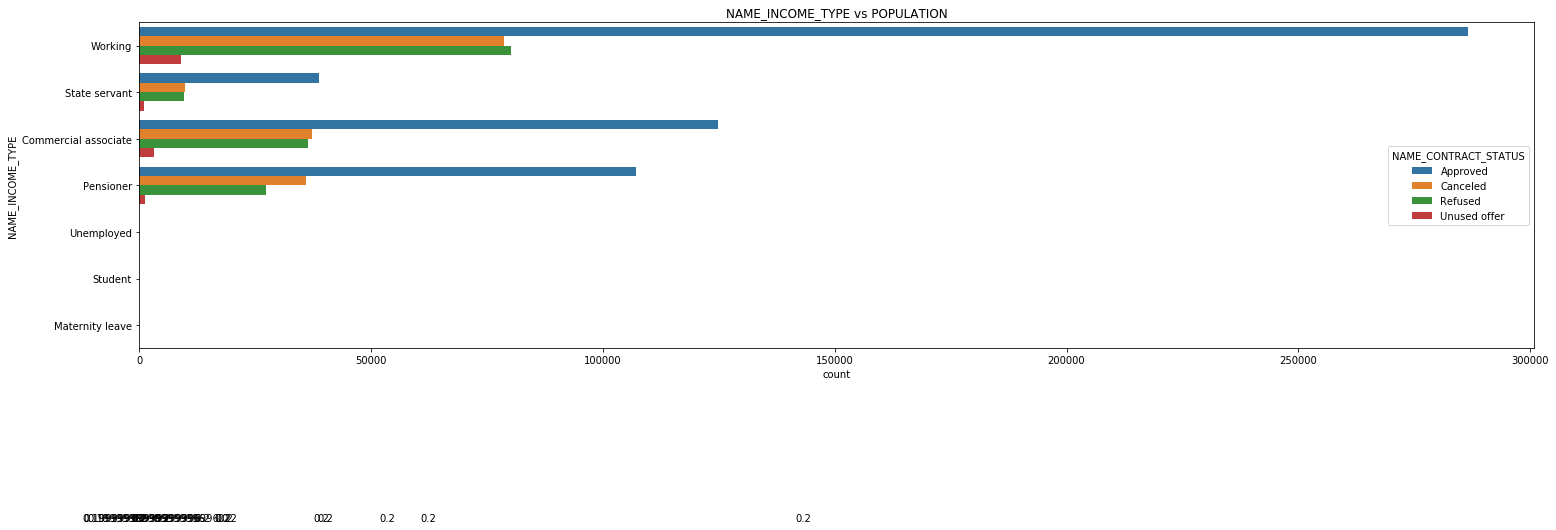

In [161]:
univariateplotm('NAME_INCOME_TYPE', 25 ,6)
plt.savefig('Mergeincome')

Most of the approved loans belonged to the working class. Followed by commercial associates and pensioners. More than one-fourth of commercial associates loans were rejected. Same is with pensioners. 

It is safe to say that most of the approved loans belong to the working class

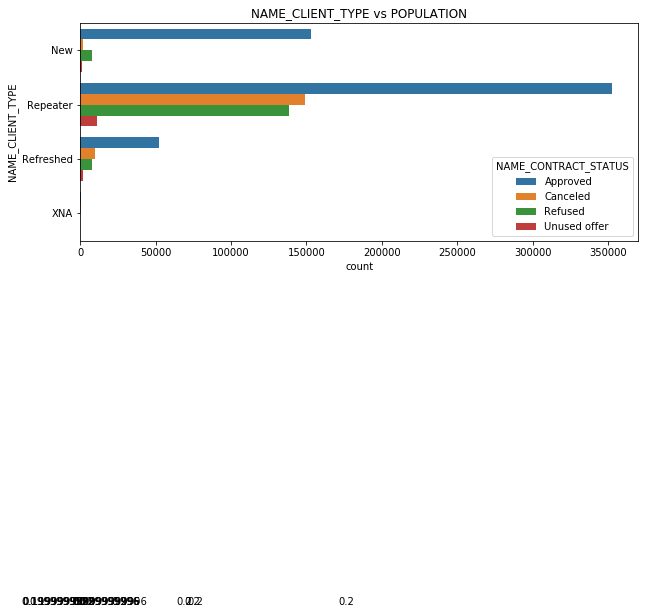

In [162]:
univariateplotm("NAME_CLIENT_TYPE", 10,4)

Most of the approved loans are of the repeater category of clients. 

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


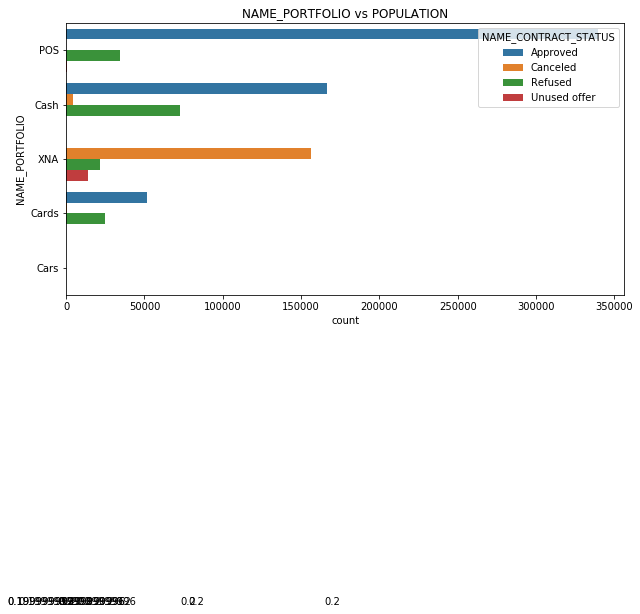

In [163]:
univariateplotm('NAME_PORTFOLIO', 10, 5)

POS portfolio of loans were approved the most followed by cash. 

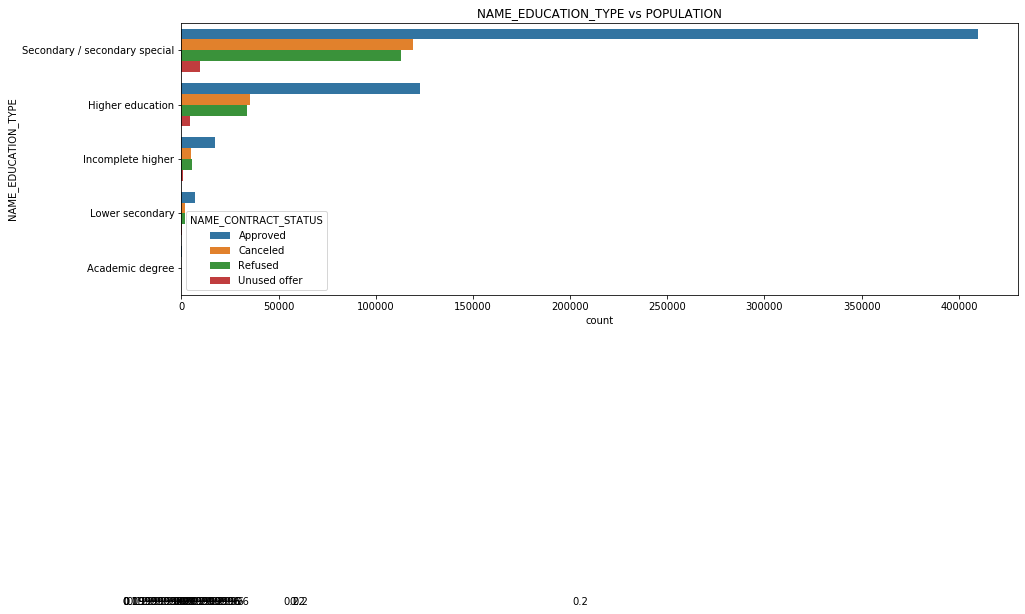

In [164]:
univariateplotm('NAME_EDUCATION_TYPE',15,5)

Most of the approved loans were of the secondary and higher educated folks. 

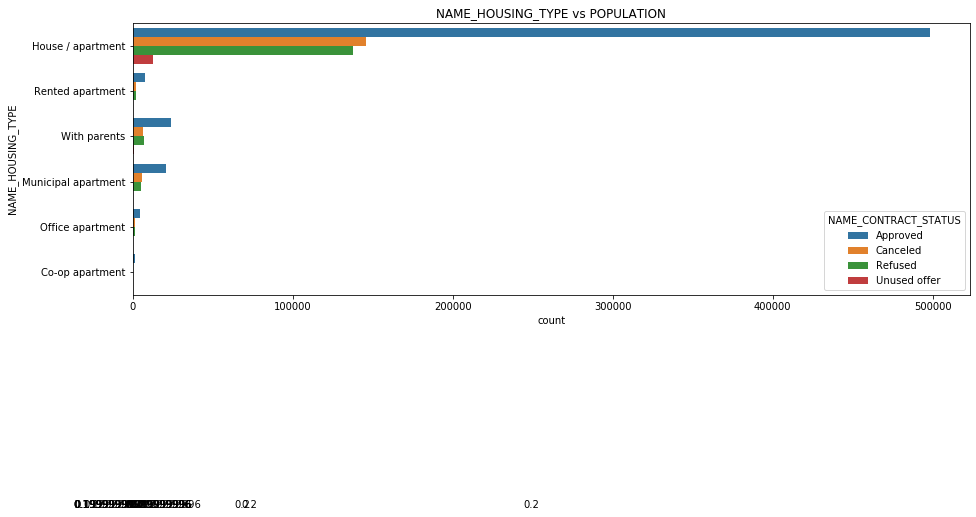

In [165]:
univariateplotm('NAME_HOUSING_TYPE',15,5)

Most of the approved loans belonged to those who lived in house/apartment. 

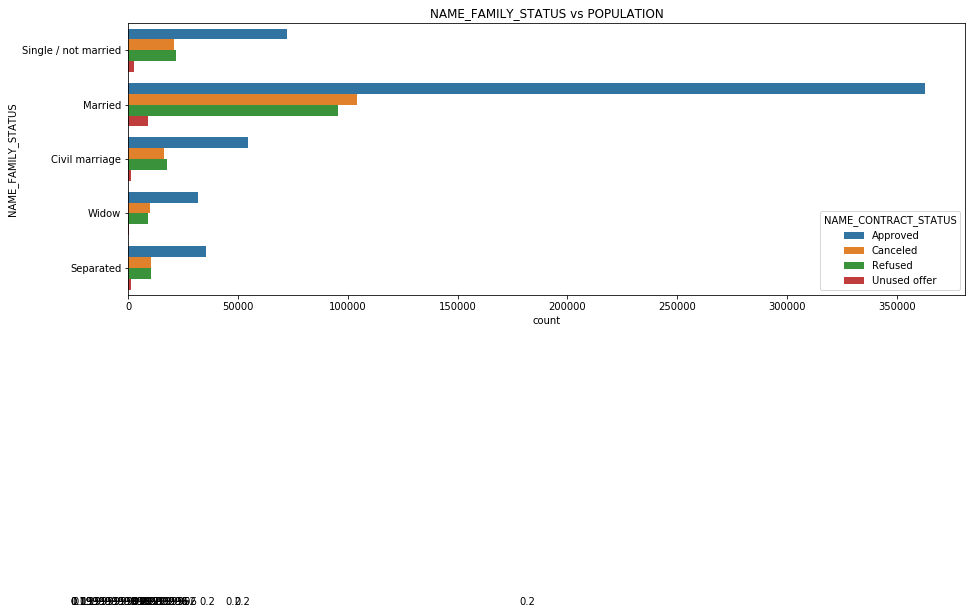

In [166]:
univariateplotm('NAME_FAMILY_STATUS', 15, 5)

Most of the approved loans were of the married folks. 

### Analysis of numerical variables in merged dataframe

In [167]:
def numunivariatem(column,l,b,scale='linear') : 
    # boxplot for column vs target
    plt.figure(figsize=(l,b))
    ax = sns.boxplot(x='NAME_CONTRACT_STATUS', y = column, data = dfmerged)
    title = column+' vs Contract Status'
    ax.set(title=title)
    if scale == 'log' :
        plt.yscale('log')
        ax.set(ylabel=column + '(Log Scale)')

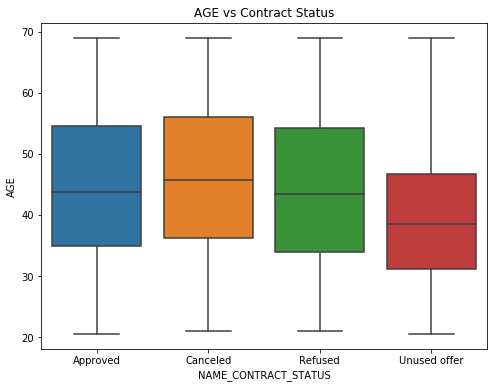

In [168]:
numunivariatem('AGE',8,6)

Age doesnt seem to play a role in refusal of loans. 

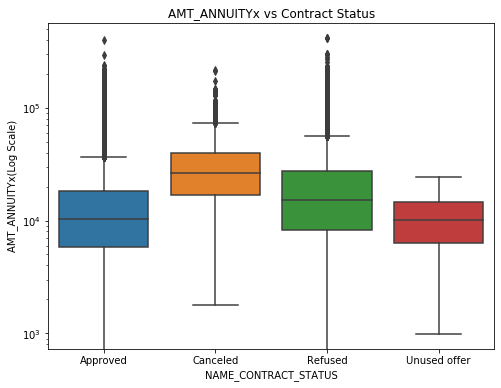

In [169]:
numunivariatem('AMT_ANNUITYx',8,6, scale = 'log')

Those with refused and cancelled loans had a greater mean annuity in previous applications.  

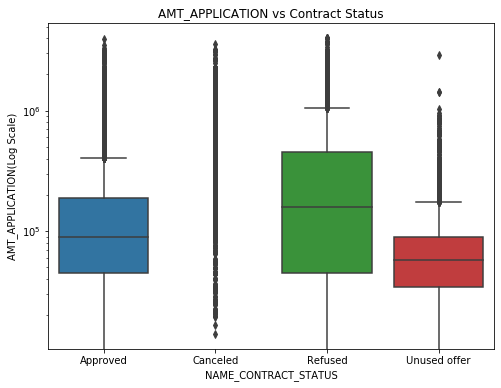

In [170]:
numunivariatem('AMT_APPLICATION',8,6,scale ='log')

Those who asked for higher credits in the previous loans got their loans refused.  

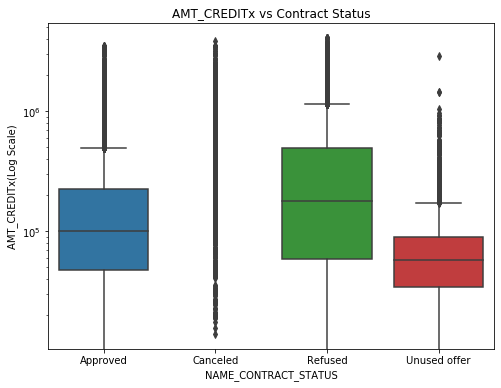

In [171]:
numunivariatem('AMT_CREDITx',8,6, scale ='log')
plt.savefig('creditmerge')

Those with higher previous credits got their loans refused. 

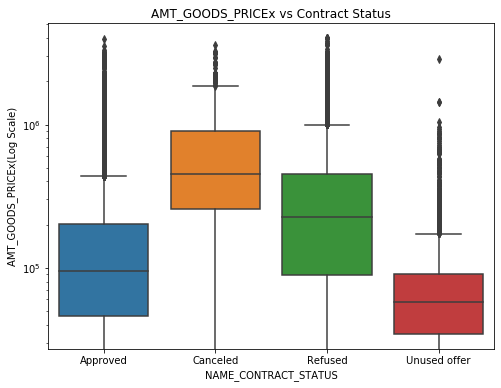

In [172]:
numunivariatem('AMT_GOODS_PRICEx',8,6,scale = 'log')
plt.savefig('amtGoodsmerge')

Those with higher goods price got their loans refused or cancelled. 

### Bivariate Analysis of merged dataframe

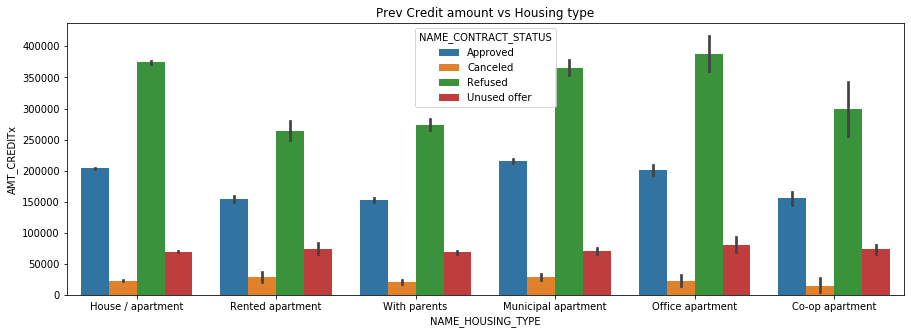

In [173]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=0)
sns.barplot(data = dfmerged, y='AMT_CREDITx',hue='NAME_CONTRACT_STATUS',x='NAME_HOUSING_TYPE')
plt.title('Prev Credit amount vs Housing type')
plt.show()

Those who had high credit and lived in Municipal apartment, Office apartment, co-op apartment loans are likely to be refused. 

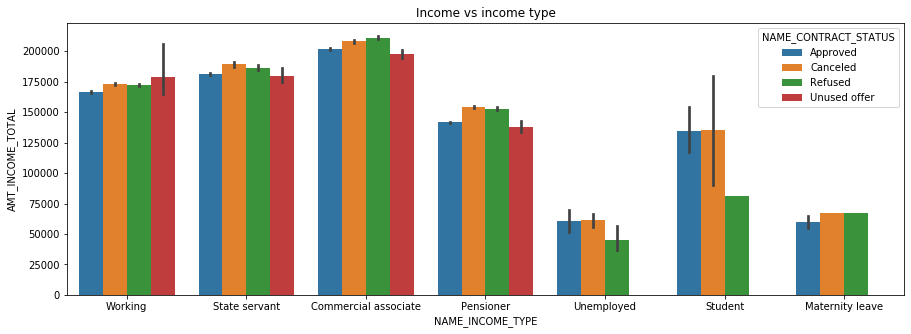

In [174]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=0)
sns.barplot(data = dfmerged, y='AMT_INCOME_TOTAL',hue='NAME_CONTRACT_STATUS',x='NAME_INCOME_TYPE')
plt.title('Income vs income type')
plt.show()

Students with income of around 150000 are likely to get approved loans. 

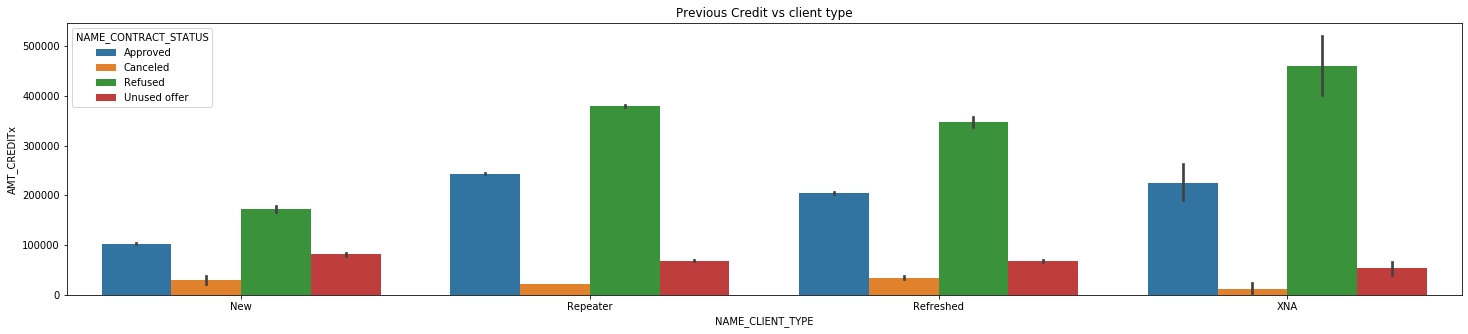

<Figure size 432x288 with 0 Axes>

In [175]:
plt.figure(figsize=(25,5))
plt.xticks(rotation=0)
sns.barplot(data = dfmerged, y='AMT_CREDITx',hue='NAME_CONTRACT_STATUS',x='NAME_CLIENT_TYPE')
plt.title('Previous Credit vs client type')
plt.show()
plt.savefig('CreditClientmerge')

Repeater with high previous credit are likely to get their loans refused. 

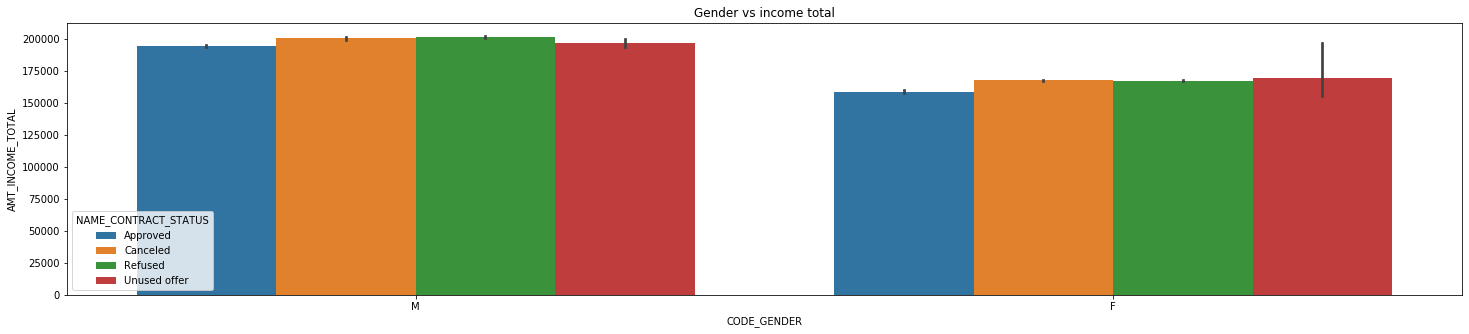

In [176]:
plt.figure(figsize=(25,5))
plt.xticks(rotation=0)
sns.barplot(data = dfmerged, y='AMT_INCOME_TOTAL',hue='NAME_CONTRACT_STATUS',x='CODE_GENDER')
plt.title('Gender vs income total')
plt.show()

Men with income around 200000 and women with income around 150000 are likely to get approved loans. 

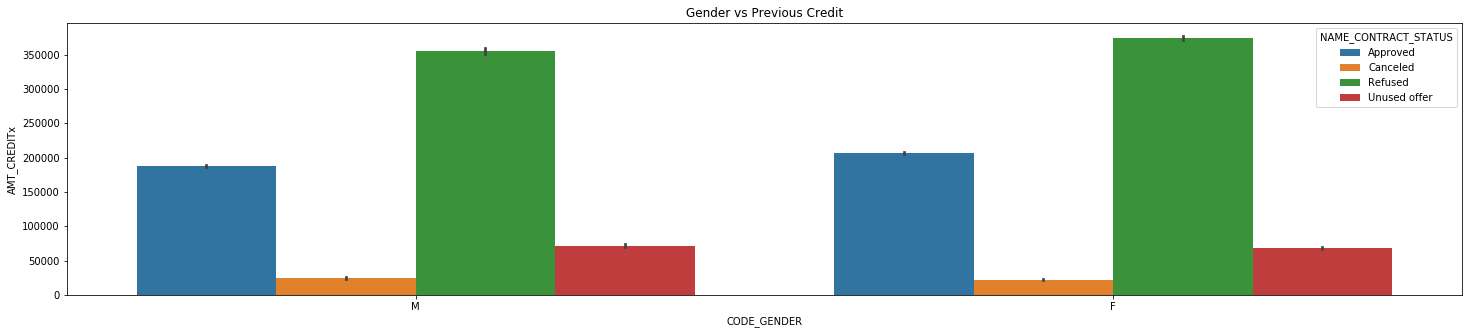

In [177]:
plt.figure(figsize=(25,5))
plt.xticks(rotation=0)
sns.barplot(data = dfmerged, y='AMT_CREDITx',hue='NAME_CONTRACT_STATUS',x='CODE_GENDER')
plt.title('Gender vs Previous Credit')
plt.show()

Women with previous credit of 200000 and men around 175000 are likely to get approved loans. 

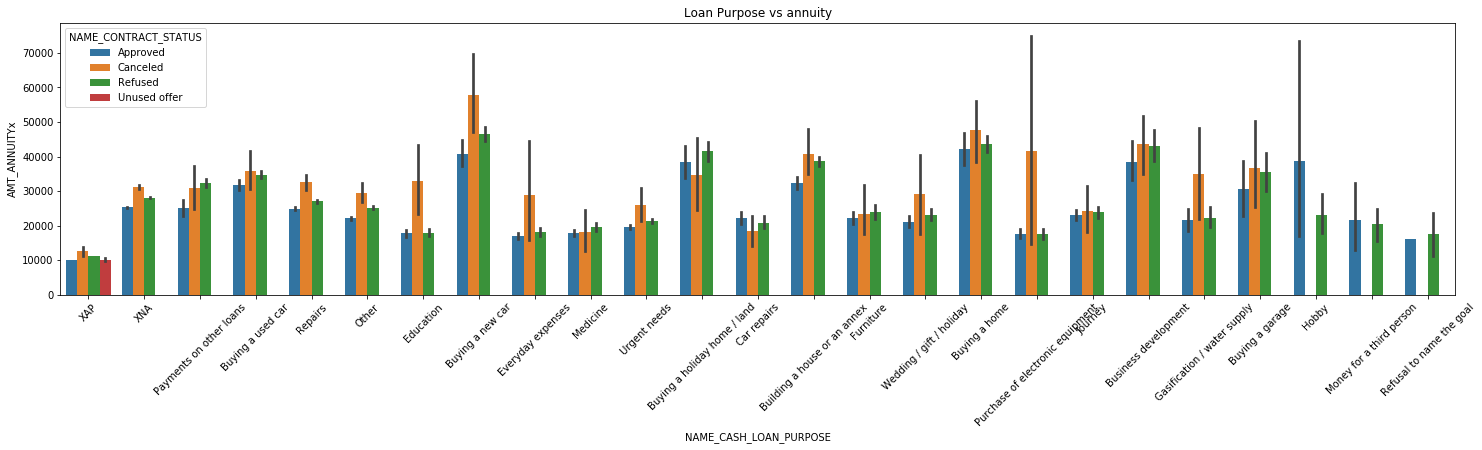

In [178]:
plt.figure(figsize=(25,5))
plt.xticks(rotation=45)
sns.barplot(data = dfmerged, y='AMT_ANNUITYx',hue='NAME_CONTRACT_STATUS',x='NAME_CASH_LOAN_PURPOSE')
plt.title('Loan Purpose vs annuity')
plt.show()

Higher annuity amount for education purposes are likely to be rejected. 
Purchase of electronic equipment/wedding/gift, education, urgent needs loans with annunity around 40000 are most likely to be approved. 

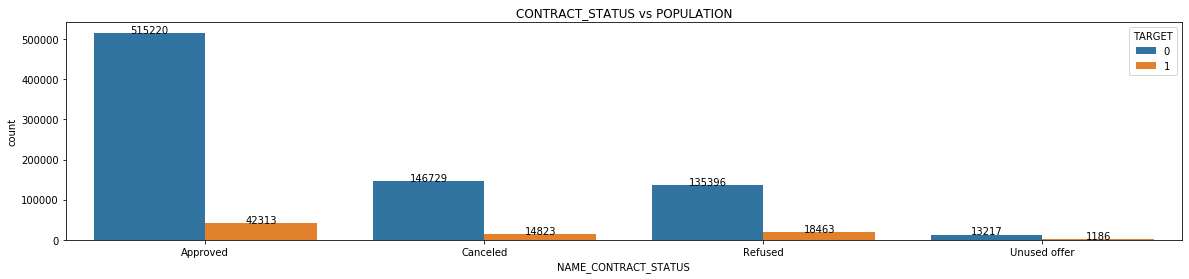

In [179]:

plt.figure(figsize=(20,4))
ax = sns.countplot(x= 'NAME_CONTRACT_STATUS',hue='TARGET',data=dfmerged)
title = 'CONTRACT_STATUS' + ' vs POPULATION'
ax.set(title= title)    
plt.xticks(rotation = 0)
    
for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2,
                height + 10,
                format(height),
                ha="center")
plt.savefig('final')

7.5% of approved loans in the past were defaulted. 9.1% of those cancelled defaulted later. 12% of refused loans defaulted. 

It is safe to say that refused and cancelled loan takers are likely to default. 

### Recommendations 

1) Labourers and low skill labourers default often.  Hence safe to leave them out.

2) Higher annuity amount for education purposes are likely to be rejected. Purchase of electronic equipment/wedding/gift, education, urgent needs loans with annunity around 40000 are most likely to be approved. 

3) Repeater with high previous credit are likely to get their loans refused. Repeaters with high credit are likely to be defaulters.

4) Students with income of around 150000 are likely to get approved loans. A good Target.

5) Those who had high credit and lived in Municipal apartment, Office apartment, co-op apartment loans are likely to be refused. Those who live in municipal apartments and co-op apartments defaulted more. Rented and those who lived with parents defaulted less. Target those who rented or lived with parents. 

6) Those with revolving loans and live with parents tend to default less. A Good category.

7) Those with academic degrees defaulted the Least. Target them

8) Single people defaulted often followed by separated people.

9) Those with cash Loans and secondary level education tend to default more. Safe to leave them out. 
